# Bachelor-Notebook

### Data sources:
- [Games_of_all_time.csv](https://www.kaggle.com/datasets/xcherry/games-of-all-time-from-metacritic)
- [metacritic_games.csv](https://www.kaggle.com/datasets/skateddu/metacritic-all-time-games-stats)


In [1]:
#Initialisiert die benötigten Libraries
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 

Code der Stata in Phython "aktiviert" 
von: https://www.stata.com/python/pystata/install.html 

In [2]:
import sys
#sys.path.append('/Applications/Stata/utilities')           #Apple Pfad
sys.path.append('C:/Program Files/Stata17/utilities')       #Windows Pfad
from pystata import config
config.init('mp')


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user 4-core network, expiring 29 Oct 2023
Serial number: 501709301768
  Licensed to: Uni Hamburg
               Universität Hamburg

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.


# 1. Einlesen der Daten

In [3]:
#Erstellt einen DataFrame (Tabelle) anhand der csv-Datei
metacrit_data = pd.read_csv(r"data/games_of_all_time.csv")

In [4]:
#Erstellt einen DataFrame (Tabelle) anhand der csv-Datei
releasedata = pd.read_csv(r"data/metacritic_games.csv")

In [5]:
#Zeigt den DataFrame der games_of_all_time.csv Datei
#ACHTUNG!!!: Es wird empfohlen, die Darstellung des Dataframes auf html zu verändern. Dafür muss der Code in dieser Zeile ausgeführt werden, auf die drei Punkte links oben vom Output geklickt werden, dann "Change Presentation" ausgewählt werden und dann bei der sich öffnenden Option "text/html" ausgewählt werden. Dies ermöglicht eine einfachere Darstellungsweise der Daten.
metacrit_data

game_name  meta_score  user_score  \
0     The Legend of Zelda: Ocarina of Time        99.0        91.0   
1                       Super Mario Galaxy        97.0        91.0   
2                     Super Mario Galaxy 2        97.0        91.0   
3                            Metroid Prime        97.0        89.0   
4                      Super Mario Odyssey        97.0        89.0   
...                                    ...         ...         ...   
8826                           kill.switch        74.0        80.5   
8827                                nail'd        69.0        76.0   
8828                        oOo: Ascension        70.0        73.0   
8829                          uDraw Studio        71.0        71.0   
8830                                   xXx        50.0        50.0   

                       platform  \
0               ['nintendo-64']   
1                       ['wii']   
2                       ['wii']   
3                  ['gamecube']   
4                    ['switch']   
...                         ...   
8826  ['xbox', 'playstation-2']   
8827                     ['pc']   
8828               ['xbox-one']   
8829                    ['wii']   
8830       ['game-boy-advance']   

                                            description  \
0     As a young boy, Link is tricked by Ganondorf, ...   
1     [Metacritic's 2007 Wii Game of the Year] The u...   
2     Super Mario Galaxy 2, the sequel to the galaxy...   
3     Samus returns in a new mission to unravel the ...   
4     New Evolution of Mario Sandbox-Style Gameplay....   
...                                                 ...   
8826  In a world on the brink of global conflict, yo...   
8827  nail’d is all about eschewing boring realism f...   
8828  oOo: Ascension is a lightning-paced test of re...   
8829  Packaged with the uDraw GameTablet, uDraw Stud...   
8830  You are underground thrill-seeker turned spy X...   

                                                    url            developer  \
0     https://www.metacritic.com/game/nintendo-64/th...             Nintendo   
1     https://www.metacritic.com/game/wii/super-mari...             Nintendo   
2     https://www.metacritic.com/game/wii/super-mari...  Nintendo EAD Tokyo    
3     https://www.metacritic.com/game/gamecube/metro...        Retro Studios   
4     https://www.metacritic.com/game/switch/super-m...             Nintendo   
...                                                 ...                  ...   
8826    https://www.metacritic.com/game/xbox/killswitch                Namco   
8827           https://www.metacritic.com/game/pc/naild             Techland   
8828  https://www.metacritic.com/game/xbox-one/ooo-a...        Kenny Creanor   
8829   https://www.metacritic.com/game/wii/udraw-studio                  THQ   
8830  https://www.metacritic.com/game/game-boy-advan...      Digital Eclipse   

                                                genre          type rating  
0                     ['Action Adventure', 'Fantasy']  singleplayer      E  
1                      ['Action', 'Platformer', '3D']  singleplayer      E  
2                      ['Action', 'Platformer', '3D']  singleplayer      E  
3     ['Action', 'Shooter', 'First-Person', 'Sci-Fi']  singleplayer      T  
4                      ['Action', 'Platformer', '3D']  singleplayer   E10+  
...                                               ...           ...    ...  
8826  ['Action', 'Shooter', 'Third-Person', 'Modern']  singleplayer      T  
8827    ['Driving', 'Racing', 'Arcade', 'Automobile']  singleplayer   E10+  
8828                  ['Action', 'General', 'Arcade']   multiplayer      E  
8829                     ['Miscellaneous', 'General']           NaN      E  
8830                   ['Action', 'Platformer', '2D']  singleplayer      E  

[8831 rows x 10 columns]

In [6]:
#Zeigt den DataFrame der metacritic_games.csv Datei
releasedata

name platform                        developer  \
0                Command & Conquer       PC                 Westwood Studios   
1                    Full Throttle       PC                        LucasArts   
2           Battle Arena Toshinden       PS                          Tamsoft   
3      Sid Meier's Civilization II       PC                         MPS Labs   
4                            Quake       PC                      id Software   
...                            ...      ...                              ...   
20417        ARK: Survival Evolved   Switch                  Studio Wildcard   
20418             Wild West Online       PC                              NaN   
20419                The Quiet Man      PS4  Square Enix, Human Head Studios   
20420                      Awkward   Switch            Snap Finger Click Ltd   
20421                       Tennis   Switch                      D3Publisher   

                   publisher          genre(s)                players rating  \
0         Virgin Interactive            Sci-Fi                   1-4       T   
1                  LucasArts         Adventure                    NaN    NaN   
2                       SCEA            Action                   1-2       T   
3                 MicroProse          Strategy               1 Player    K-A   
4                id Software            Action                  1-16       M   
...                      ...               ...                    ...    ...   
20417        Studio Wildcard  Action Adventure     Online Multiplayer      T   
20418                    NaN      Role-Playing     Online Multiplayer    NaN   
20419            Square Enix  Action Adventure  No Online Multiplayer      M   
20420  Snap Finger Click Ltd     Miscellaneous  No Online Multiplayer      M   
20421            D3Publisher            Sports  No Online Multiplayer      E   

      attribute  release_date                                      link  \
0           NaN  Aug 31, 1995                  /game/pc/command-conquer   
1           NaN  Apr 30, 1995                    /game/pc/full-throttle   
2           NaN  Sep  9, 1995  /game/playstation/battle-arena-toshinden   
3           NaN  Feb 29, 1996       /game/pc/sid-meiers-civilization-ii   
4           NaN  Jun 22, 1996                            /game/pc/quake   
...         ...           ...                                       ...   
20417       NaN  Nov 30, 2018         /game/switch/ark-survival-evolved   
20418       NaN  May 10, 2018                 /game/pc/wild-west-online   
20419       NaN  Nov  1, 2018         /game/playstation-4/the-quiet-man   
20420       NaN  Jul  5, 2018                      /game/switch/awkward   
20421       NaN  Jan 25, 2018                       /game/switch/tennis   

       critic_positive  critic_neutral  critic_negative  metascore  \
0                    5               0                0         94   
1                    6               2                0         86   
2                    1               3                0         69   
3                    7               0                0         94   
4                    9               0                0         94   
...                ...             ...              ...        ...   
20417                0               1               11         29   
20418                0               0                8         29   
20419                1               0               20         28   
20420                0               0                4         28   
20421                0               0                4         28   

       user_positive  user_neutral  user_negative user_score  
0                 47             0              1        8.9  
1                 18             1              0        8.7  
2                  1             0              1        5.8  
3                 46             0              1        8.9  
4                 84             4              1  

# 2. Hauptdatensatz:

### 2.1. Erstellung des Datensatzes:

In [7]:
#Anpassung der "URL" Spalte an die "Link" Spalte des release_data - Datensatzes um ein zusammenfügen anhand der einzigartigen Internet-Adresse zu ermöglichen.
metacrit_data.url = metacrit_data.url.str.replace("https://www.metacritic.com/", "/")
#metacrit_data

C:\Users\Marek\AppData\Local\Temp/ipykernel_5280/1848361479.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  metacrit_data.url = metacrit_data.url.str.replace("https://www.metacritic.com/", "/")


In [8]:
#Erstellung eines neuen Datensatzes mit den Spalten des releasedata-Datensatzes, welche mit dem Main-Datensatzes gemerged werden sollen
releasedata_mergeprep= releasedata[["publisher", "release_date", "link"] ].copy()
#releasedata_mergeprep

In [9]:
#Merge die Ausgewählten Spalten des releasedata-Datensatzes mit dem Main-Datensatz anhand der "URL" und "LINK" Spalte. Fehlende Werte werden als 0 eingetragen.
metacrit_data = pd.merge(metacrit_data, releasedata_mergeprep, left_on=["url"], right_on=["link"], how="left").fillna(0)
#metacrit_data

In [10]:
#Entfernt die link- und url-Spalte aus dem Datensatz, da diese nicht mehr benötigt werden
metacrit_data.drop(columns=["link"], inplace=True)
metacrit_data.drop(columns=["url"], inplace=True)

### 2.2. Anpassungen

##### 2.2.1. Genre Aufsplittung

In [11]:
#Gibt an wie Häufig maximal ein "," in der Spalte "genre" vorkommt. Davon lässt sich ableiten, wie viele unterschiedliche Genres maximal in einer bestimmten Zelle stehen. (In diesem Falle sind es 10)
metacrit_data["genre"].str.count(",").max()

9.0

In [12]:
#Aufsplittung der Genre Spalte in einzelne Spalten für einfachere Übersicht. Da zuvor herausgefunden wurde, dass 10 die maximale Genre Anzahl ist, werden 10 Spalten genutzt. (Ebenfalls mit 9 und 11 Spalten getestet. Fehlercode: "Columns must be same length as key". 10 als maximale Genre Anzahl bestätigt )
metacrit_data[["genre1","genre2","genre3","genre4","genre5","genre6","genre7","genre8","genre9", "genre10"]] = metacrit_data["genre"].str.split(",", expand=True) 
metacrit_data

game_name  meta_score  user_score  \
0     The Legend of Zelda: Ocarina of Time        99.0        91.0   
1                       Super Mario Galaxy        97.0        91.0   
2                     Super Mario Galaxy 2        97.0        91.0   
3                            Metroid Prime        97.0        89.0   
4                      Super Mario Odyssey        97.0        89.0   
...                                    ...         ...         ...   
8826                           kill.switch        74.0        80.5   
8827                                nail'd        69.0        76.0   
8828                        oOo: Ascension        70.0        73.0   
8829                          uDraw Studio        71.0        71.0   
8830                                   xXx        50.0        50.0   

                       platform  \
0               ['nintendo-64']   
1                       ['wii']   
2                       ['wii']   
3                  ['gamecube']   
4                    ['switch']   
...                         ...   
8826  ['xbox', 'playstation-2']   
8827                     ['pc']   
8828               ['xbox-one']   
8829                    ['wii']   
8830       ['game-boy-advance']   

                                            description            developer  \
0     As a young boy, Link is tricked by Ganondorf, ...             Nintendo   
1     [Metacritic's 2007 Wii Game of the Year] The u...             Nintendo   
2     Super Mario Galaxy 2, the sequel to the galaxy...  Nintendo EAD Tokyo    
3     Samus returns in a new mission to unravel the ...        Retro Studios   
4     New Evolution of Mario Sandbox-Style Gameplay....             Nintendo   
...                                                 ...                  ...   
8826  In a world on the brink of global conflict, yo...                Namco   
8827  nail’d is all about eschewing boring realism f...             Techland   
8828  oOo: Ascension is a lightning-paced test of re...        Kenny Creanor   
8829  Packaged with the uDraw GameTablet, uDraw Stud...                  THQ   
8830  You are underground thrill-seeker turned spy X...      Digital Eclipse   

                                                genre          type rating  \
0                     ['Action Adventure', 'Fantasy']  singleplayer      E   
1                      ['Action', 'Platformer', '3D']  singleplayer      E   
2                      ['Action', 'Platformer', '3D']  singleplayer      E   
3     ['Action', 'Shooter', 'First-Person', 'Sci-Fi']  singleplayer      T   
4                      ['Action', 'Platformer', '3D']  singleplayer   E10+   
...                                               ...           ...    ...   
8826  ['Action', 'Shooter', 'Third-Person', 'Modern']  singleplayer      T   
8827    ['Driving', 'Racing', 'Arcade', 'Automobile']  singleplayer   E10+   
8828                  ['Action', 'General', 'Arcade']   multiplayer      E   
8829                     ['Miscellaneous', 'General']             0      E   
8830                   ['Action', 'Platformer', '2D']  singleplayer      E   

               publisher  ...               genre1         genre2  \
0               Nintendo  ...  ['Action Adventure'     'Fantasy']   
1               Nintendo  ...            ['Action'   'Platformer'   
2               Nintendo  ...            ['Action'   'Platformer'   
3               Nintendo  ...            ['Action'      'Shooter'   
4               Nintendo  ...            ['Action'   'Platformer'   
...                  ...  ...                  ...            ...   
8826               Namco  ...            ['Action'      'Shooter'   
8827         Deep Silver  ...           ['Driving'       'Racing'   
8828  Extra Mile Studios  ...            ['Action'      'General'   
8829                 THQ  ...     ['Miscellaneous'     'General']   
8830          Activision  ...            ['Action'   'Platformer'   

               genre3          genre4 genre5

In [13]:
#Löscht ungewünschte Zeichen aus den entsprechenden genre Spalten
x=1
chars="[],' "
while x<11:
    for c in chars:
        metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].str.replace(c, "")
    x=x+1

C:\Users\Marek\AppData\Local\Temp/ipykernel_5280/2132432586.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].str.replace(c, "")


##### 2.2.2. Niche Width-Spalte:

In [14]:
#Erstellt neue Spalte mit dem Namen "niche_width". Setzt alle Einträge gleich 0
metacrit_data["niche_width"]=0
metacrit_data

game_name  meta_score  user_score  \
0     The Legend of Zelda: Ocarina of Time        99.0        91.0   
1                       Super Mario Galaxy        97.0        91.0   
2                     Super Mario Galaxy 2        97.0        91.0   
3                            Metroid Prime        97.0        89.0   
4                      Super Mario Odyssey        97.0        89.0   
...                                    ...         ...         ...   
8826                           kill.switch        74.0        80.5   
8827                                nail'd        69.0        76.0   
8828                        oOo: Ascension        70.0        73.0   
8829                          uDraw Studio        71.0        71.0   
8830                                   xXx        50.0        50.0   

                       platform  \
0               ['nintendo-64']   
1                       ['wii']   
2                       ['wii']   
3                  ['gamecube']   
4                    ['switch']   
...                         ...   
8826  ['xbox', 'playstation-2']   
8827                     ['pc']   
8828               ['xbox-one']   
8829                    ['wii']   
8830       ['game-boy-advance']   

                                            description            developer  \
0     As a young boy, Link is tricked by Ganondorf, ...             Nintendo   
1     [Metacritic's 2007 Wii Game of the Year] The u...             Nintendo   
2     Super Mario Galaxy 2, the sequel to the galaxy...  Nintendo EAD Tokyo    
3     Samus returns in a new mission to unravel the ...        Retro Studios   
4     New Evolution of Mario Sandbox-Style Gameplay....             Nintendo   
...                                                 ...                  ...   
8826  In a world on the brink of global conflict, yo...                Namco   
8827  nail’d is all about eschewing boring realism f...             Techland   
8828  oOo: Ascension is a lightning-paced test of re...        Kenny Creanor   
8829  Packaged with the uDraw GameTablet, uDraw Stud...                  THQ   
8830  You are underground thrill-seeker turned spy X...      Digital Eclipse   

                                                genre          type rating  \
0                     ['Action Adventure', 'Fantasy']  singleplayer      E   
1                      ['Action', 'Platformer', '3D']  singleplayer      E   
2                      ['Action', 'Platformer', '3D']  singleplayer      E   
3     ['Action', 'Shooter', 'First-Person', 'Sci-Fi']  singleplayer      T   
4                      ['Action', 'Platformer', '3D']  singleplayer   E10+   
...                                               ...           ...    ...   
8826  ['Action', 'Shooter', 'Third-Person', 'Modern']  singleplayer      T   
8827    ['Driving', 'Racing', 'Arcade', 'Automobile']  singleplayer   E10+   
8828                  ['Action', 'General', 'Arcade']   multiplayer      E   
8829                     ['Miscellaneous', 'General']             0      E   
8830                   ['Action', 'Platformer', '2D']  singleplayer      E   

               publisher  ...      genre2        genre3      genre4 genre5  \
0               Nintendo  ...     Fantasy          None        None   None   
1               Nintendo  ...  Platformer            3D        None   None   
2               Nintendo  ...  Platformer            3D        None   None   
3               Nintendo  ...     Shooter  First-Person      Sci-Fi   None   
4               Nintendo  ...  Platformer            3D        None   None   
...                  ...  ...         ...           ...         ...    ...   
8826               Namco  ...     Shooter  Third-Person      Modern   None   
8827         Deep Silver  ...      Racing        Arcade  Automobile   None   
8828  Extra Mile Studios  ...     General        Arcade        None   None   
8829                 THQ  ...     General          None        None   None   
8830          A

In [15]:
#Passt die Spalte "niche_width" mit der entsprechenden Anzahl an Genres die ein einzelnes Spiel aufweist an.
x=1
while x<11:
    metacrit_data.loc[(metacrit_data[("genre"+str(x))].notnull()), "niche_width"]=x #Überprüft jede "genre1-10" Spalte, ob ein Wert eingetragen ist. Solange ein Wert (ein String) erkannt wird erhöht sich x um eins. Sobald kein Wert erkannt wird, wird x als niche_width Wert eingesetzt. 
    x=x+1
    print(metacrit_data["niche_width"].value_counts())

1    8827
0       4
Name: niche_width, dtype: int64
2    8826
0       4
1       1
Name: niche_width, dtype: int64
3    6441
2    2385
0       4
1       1
Name: niche_width, dtype: int64
4    3579
3    2862
2    2385
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1606
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1267
6     339
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1267
6     243
7      96
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1267
6     243
7      74
8      22
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1267
6     243
7      74
8      19
0       4
9       3
1       1
Name: niche_width, dtype: int64
3     2862
2     2385
4     1973
5     1267
6      243
7       74
8       19
0        4
9        2
1        1
10       1
Name: niche_width, dtype: int64


##### 2.2.3. Platform Width-Spalte:

In [16]:
#Gibt an wie Häufig maximal ein "," in der Spalte "platform" vorkommt. Davon lässt sich ableiten, wie viele unterschiedliche Platformen maximal in einer bestimmten Zelle stehen. (In diesem Falle 9)
metacrit_data["platform"].str.count(",").max()

8

In [17]:
#Aufsplittung der platform Spalte in einzelne Spalten für Rechnung:
metacrit_data[["platform1","platform2","platform3","platform4","platform5","platform6","platform7","platform8","platform9"]] = metacrit_data["platform"].str.split(",", expand=True) 
#metacrit_data

In [18]:
#Erstellt neue Spalte mit dem Namen "platform_width"
metacrit_data["platform_width"]=0
#metacrit_data

In [19]:
# Passt die Spalte "platform_width" mit der entsprechenden Anzahl an Platformen die ein einzelnes Spiel aufweist an
x=1
while x<10:
    metacrit_data.loc[(metacrit_data[("platform"+str(x))].notnull()), "platform_width"]=x
    x=x+1
    print(metacrit_data["platform_width"].value_counts())

1    8831
Name: platform_width, dtype: int64
1    6581
2    2250
Name: platform_width, dtype: int64
1    6581
2    1538
3     712
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     184
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     137
5      47
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     137
5      38
6       9
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     137
5      38
6       6
7       3
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     137
5      38
6       6
7       2
8       1
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     137
5      38
6       6
7       2
9       1
Name: platform_width, dtype: int64


In [20]:
#Löscht die einzelnen Platform Spalten, da diese nicht mehr benötigt werden und den Datensatz unübersichtlicher machen
x=1
while x<10:
    metacrit_data.drop(columns=[("platform"+str(x))], inplace=True)
    x=x+1
#metacrit_data

##### 2.2.4. Veröffentlichungsjahr-Spalte

In [21]:
# Trennt die "release_date" Spalte in eine Datums und Jahres Spalte auf.
metacrit_data[["date","year"]] = metacrit_data["release_date"].str.split(",", expand=True) 

In [22]:
#Löscht die Datums Spalte, da nur das Jahr benötigt wird
metacrit_data.drop(columns=["date"], inplace=True)

In [23]:
metacrit_data["year"].dtypes

dtype('O')

In [24]:
#Ändert den Datentyp der Jahres Spalte von "object" in "float64", damit rechnungen möglich werden. 
metacrit_data["year"]= pd.to_numeric(metacrit_data["year"])
metacrit_data["year"].dtypes

dtype('float64')

##### 2.2.5. Fehlende Werte:

In [25]:
# Gibt einen Überblick über die fehlenden Werte (bzw. die nicht fehlenden Werte: non-null)
metacrit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 0 to 8830
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_name       8831 non-null   object 
 1   meta_score      8831 non-null   float64
 2   user_score      8831 non-null   float64
 3   platform        8831 non-null   object 
 4   description     8831 non-null   object 
 5   developer       8831 non-null   object 
 6   genre           8831 non-null   object 
 7   type            8831 non-null   object 
 8   rating          8831 non-null   object 
 9   publisher       8831 non-null   object 
 10  release_date    8831 non-null   object 
 11  genre1          8827 non-null   object 
 12  genre2          8826 non-null   object 
 13  genre3          6441 non-null   object 
 14  genre4          3579 non-null   object 
 15  genre5          1606 non-null   object 
 16  genre6          339 non-null    object 
 17  genre7          96 non-null     o

In [26]:
#Zeigt das es 4 Fälle mit 0 Genres gibt.  
metacrit_data["niche_width"].value_counts()
#0 wird in der niche_width Spalte als fehlender Wert gesetzt:
metacrit_data["niche_width"]=metacrit_data["niche_width"].replace(0, np.nan)

In [27]:
#Jedes Spiel ist minimal auf einer Platform verfügbar. (Keine Fehlenden Werte)
metacrit_data["platform_width"].value_counts()

1    6581
2    1538
3     528
4     137
5      38
6       6
7       2
9       1
Name: platform_width, dtype: int64

In [28]:
#Jedes Spiel hat eine Jahreszahl zugewiesen bekommen. (Keine Fehlenden Werte bzw. fehlende Werte wurden bereits definiert)
metacrit_data["year"].value_counts()

2018.0    498
2017.0    473
2016.0    458
2009.0    454
2008.0    438
2007.0    420
2015.0    419
2006.0    406
2011.0    401
2010.0    381
2002.0    381
2005.0    375
2012.0    374
2003.0    371
2014.0    365
2013.0    355
2004.0    345
2001.0    283
2000.0    200
1998.0     33
1999.0     33
1997.0     20
1996.0     16
1995.0      1
Name: year, dtype: int64

In [29]:
#Gibt die Summe der fehlenden Werte für die year-Spalte an
sum(metacrit_data["year"].isnull())

1331

In [30]:
#In der jeweiligen Spalte wird 0 als fehlender Wert gesetzt
metacrit_data["publisher"]=metacrit_data["publisher"].replace(0, np.nan)
metacrit_data["release_date"]=metacrit_data["release_date"].replace(0, np.nan)


In [31]:
metacrit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 0 to 8830
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_name       8831 non-null   object 
 1   meta_score      8831 non-null   float64
 2   user_score      8831 non-null   float64
 3   platform        8831 non-null   object 
 4   description     8831 non-null   object 
 5   developer       8831 non-null   object 
 6   genre           8831 non-null   object 
 7   type            8831 non-null   object 
 8   rating          8831 non-null   object 
 9   publisher       7498 non-null   object 
 10  release_date    7500 non-null   object 
 11  genre1          8827 non-null   object 
 12  genre2          8826 non-null   object 
 13  genre3          6441 non-null   object 
 14  genre4          3579 non-null   object 
 15  genre5          1606 non-null   object 
 16  genre6          339 non-null    object 
 17  genre7          96 non-null     o

In [32]:
#Maximalwert und Minimalwert liegen zwichen 0 und 100. Aufgrund von des float64-Spaltentypes können so fehlende Werte ausgeschlossen werden.
print(metacrit_data["meta_score"].max())
print(metacrit_data["meta_score"].min())

99.0
11.0


In [33]:
#Maximalwert und Minimalwert liegen zwichen 0 und 100. Aufgrund von des float64-Spaltentypes können so fehlende Werte ausgeschlossen werden. 
print(metacrit_data["user_score"].max())
print(metacrit_data["user_score"].min())

98.0
2.0


In [34]:
#Entfernt alle nicht weiter benötigten Spalten
metacrit_data.drop(columns=["description", "rating", "type"], inplace=True)


##### 2.2.6. überprüfung der Daten:

In [35]:
#Dies ist der genutze Code um den zufälligen Datensatz zu gorben überprüfung zu erstellen. Der Code wurde aus-kommentiert, da bei einer erneuten durchführung neue zufällige Fälle ausgewählt würden     
    #Zeigt Ausschnitt aus dem Datensatz an. 
    #metacrit_data_random=metacrit_data.sample(n=30)
    #Speichert den Dataframe als Excel Datei ab
    #metacrit_data_random.to_excel("data/Random_Data.xlsx")

In [36]:
#Liest den zufälligen Datensatz wieder als DataFrame ein, um ihn anzeigen zu können.
metacrit_data_random = pd.read_excel(r"data/Random_Data.xlsx")
metacrit_data_random

Unnamed: 0                                          game_name  meta_score  \
0           53                                          Homeworld       93.00   
1         5091            Dark Souls II: Crown of the Sunken King       81.67   
2          188            NieR: Automata - Become as Gods Edition       90.00   
3         1952            Darkstalkers Chronicle: The Chaos Tower       74.00   
4         4253                    Alone in the Dark: Illumination       19.00   
5         4870                               Catherine: Full Body       80.50   
6         4425             Arcade Classics Anniversary Collection       62.00   
7         7892                                       Superliminal       77.25   
8         8034                                       The Darkness       81.00   
9         3302                                         Happy Wars       61.00   
10        1707                                     Hunt: Showdown       76.00   
11        5586                          Fast & Furious Crossroads       34.50   
12        3381               Cyanide & Happiness - Freakpocalypse       60.00   
13        4064                       MX vs. ATV Supercross Encore       42.00   
14        3148                                         Space Hack       63.00   
15        3435                                   NFL GameDay 2003       60.00   
16        4472                    Assassin's Creed IV: Black Flag       86.00   
17        8794  Yu-Gi-Oh! 7 Trials to Glory: World Championshi...       66.00   
18        4311                              ARK: Survival Evolved       70.00   
19        8098            The King of Fighters '98 Ultimate Match       73.00   
20        4096                                          Seduce Me       41.00   
21          50                                   Persona 4 Golden       93.00   
22        8523                              Urban Trial Freestyle       64.00   
23        7424      Sam & Max Episode 205: What's New, Beelzebub?       85.00   
24         366                                     WHAT THE GOLF?       84.00   
25        7076                                       Planet Alpha       70.33   
26         351                                   NCAA Football 11       85.00   
27        5197                             Deus Ex: Invisible War       82.00   
28        5874                            Guitar Hero: Smash Hits       72.50   
29        4802                               Call of Duty Classic       75.00   

    user_score                                       platform  \
0         88.0                                         ['pc']   
1         78.7            ['playstation-3', 'pc', 'xbox-360']   
2         90.0                                   ['xbox-one']   
3         79.0                                        ['psp']   
4         13.0                                         ['pc']   
5         82.0                    ['playstation-4', 'switch']   
6         44.5                    ['playstation-4', 'switch']   
7         85.7  ['playstation-4', 'xbox-one', 'switch', 'pc']   
8         79.0                  ['xbox-360', 'playstation-3']   
9         70.0                                   ['xbox-360']   
10        67.0                                   ['xbox-one']   
11        17.0                        ['playstation-4', 'pc']   
12        60.0                                         ['pc']   
13        42.0                              ['playstation-4']   
14        76.0                                         ['pc']   
15        60.0                              ['playstation-2']   
16        80.3            ['playstation-3', 'xbox-360', 'pc']   
17        87.0                           ['game-boy-advance']   
18        63.0                                         ['pc']   
19        88.0                              ['playstation-2']   
20        34.0                                         ['pc']   
21        86.0                           ['playstation-vita'] 

# 3. Beschreibung des Datensatzes: 


### 3.1. Umgang mit Platformen

In [37]:
#Gibt die maximal vorkommende Häufigkeit eines Namens an. (Einmal für den Hauptdatensatz und einem für den releasedata-Datensatz)
print(metacrit_data["game_name"].value_counts().max())
print(releasedata["name"].value_counts().max())

1
10


In [38]:
#Gibt eine bestimmte Reihe anhand des Index-Wertes wieder
metacrit_data.loc[4425]

game_name         Arcade Classics Anniversary Collection
meta_score                                          62.0
user_score                                          44.5
platform                     ['playstation-4', 'switch']
developer                                         Konami
genre                   ['Miscellaneous', 'Compilation']
publisher                                            NaN
release_date                                         NaN
genre1                                     Miscellaneous
genre2                                       Compilation
genre3                                              None
genre4                                              None
genre5                                              None
genre6                                              None
genre7                                              None
genre8                                              None
genre9                                              None
genre10                        

### 3.2. Wichtige Variablen

In [39]:
#Zeigt die Spaltentitel an
metacrit_data.columns

Index(['game_name', 'meta_score', 'user_score', 'platform', 'developer',
       'genre', 'publisher', 'release_date', 'genre1', 'genre2', 'genre3',
       'genre4', 'genre5', 'genre6', 'genre7', 'genre8', 'genre9', 'genre10',
       'niche_width', 'platform_width', 'year'],
      dtype='object')

##### 3.2.1. Metascore

In [40]:
#Gibt für die unterschiedlichen Spalten mit NUR Zahlenwerten, bestimmte statistische Werte wieder.
metacrit_data.describe()

meta_score   user_score  niche_width  platform_width         year
count  8831.000000  8831.000000  8827.000000     8831.000000  7500.000000
mean     70.876621    69.903918     3.369208        1.363153  2009.493733
std      12.181944    13.161456     1.175403        0.722739     5.493037
min      11.000000     2.000000     1.000000        1.000000  1995.000000
25%      63.000000    63.000000     2.000000        1.000000  2005.000000
50%      73.000000    72.800000     3.000000        1.000000  2009.000000
75%      80.000000    79.000000     4.000000        2.000000  2014.000000
max      99.000000    98.000000    10.000000        9.000000  2018.000000

In [41]:
#Gibt an wie häufig ein einzigartiger Wert vorkommt. (Hieraus lässt sich der Modus ableiten)
metacrit_data["meta_score"].value_counts()

80.00    371
77.00    352
76.00    345
74.00    344
72.00    289
        ... 
96.80      1
76.75      1
44.50      1
50.50      1
46.67      1
Name: meta_score, Length: 297, dtype: int64

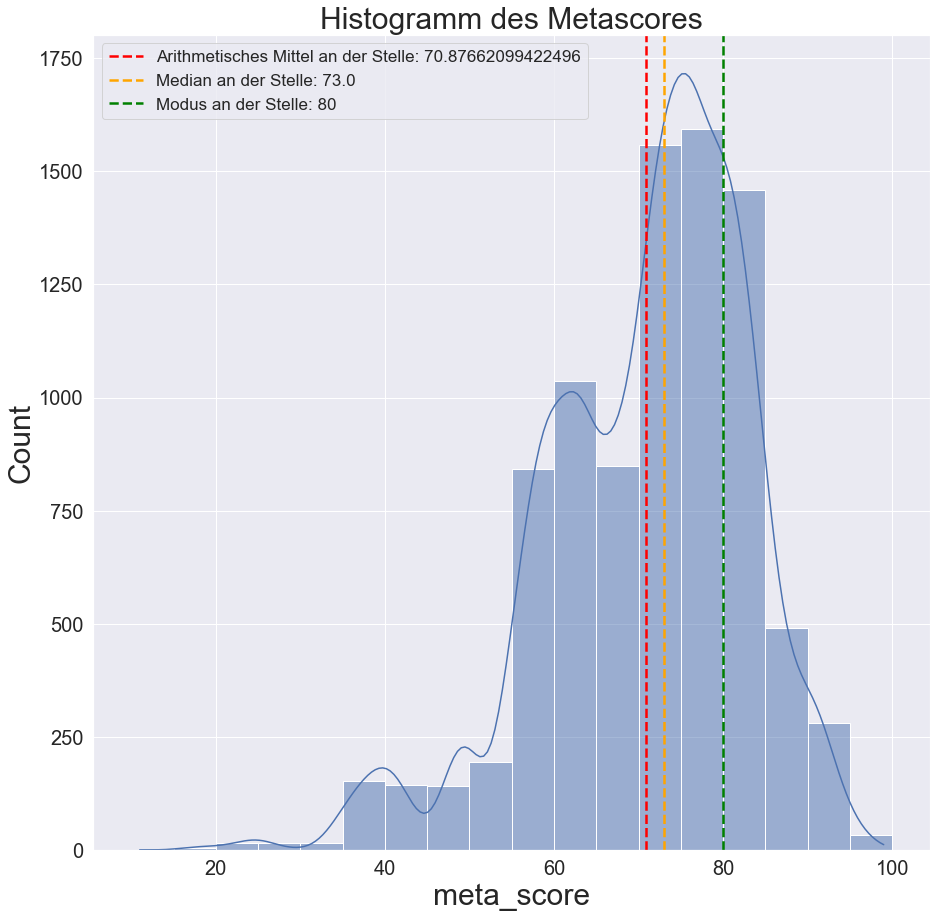

In [42]:
#Erstellt ein Histogram für die meta_score-Spalte
sns.set(rc = {'figure.figsize':(15,15)})                                                     #Setzt die Größe der Grafik fest
sns.histplot(metacrit_data.meta_score, binwidth=5, binrange=[10,100], kde=True)              #Erstellt Histogram mit einer Balkenbreite von 5 Skalenwerten und einer eingezeichneten Verteilungskurve
plt.xlabel("meta_score", size=30)                                                            #Passt den Titel der x-Achse an und dessen größe 
plt.ylabel("Count", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
plt.tick_params(axis='both', which='major', labelsize=20)                                    #Passt die größe der x und y Achse an
plt.axvline(x=metacrit_data["meta_score"].mean(),color='red',ls='--', lw=2.5, label=("Arithmetisches Mittel an der Stelle: "+str(metacrit_data["meta_score"].mean())))                #Erstellt eine Gerade an der Stelle des arithmetischen Mittels
plt.axvline(x=metacrit_data["meta_score"].median(),color='orange',ls='--', lw=2.5, label=("Median an der Stelle: "+str(metacrit_data["meta_score"].median())))                        #Erstellt eine Gerade an der Stelle des Medians
plt.axvline(x=80,color='green',ls='--', lw=2.5, label="Modus an der Stelle: 80")                                                                                                      #Erstellt eine Gerade an der Stelle des Modus (manuell eingegeben)
plt.legend(loc='upper left', prop={'size': 17})
plt.title("Histogramm des Metascores", size=30)                                              #Setzt den Titel der Grafik und dessen Größe fest
plt.savefig("Pictures/histogram_metascore.jpg")                                              #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


In [43]:
#Gibt den Interquartils-Abstand der meta_score-Spalte wieder
stats.iqr(metacrit_data["meta_score"])

17.0

In [44]:
#Berechnung der Grenze des oberen und unteren Whiskers:
IQA=17
Q3=80
Q1=63
print("Obere Whisker Grenze: "+str(Q3+(IQA*1.5)))
print("Untere Whisker Grenze: "+str(Q1-(IQA*1.5)))
print("Unterer Grenzwert für Extremwerte: "+str(Q1-(IQA*3)))

Obere Whisker Grenze: 105.5
Untere Whisker Grenze: 37.5
Unterer Grenzwert für Extremwerte: 12


In [45]:
#Gibt die Anzahl an Reihen und damit die Anzahl an Fällen an, die unter den gesetzten Werten liegen
print(metacrit_data[(metacrit_data["meta_score"]<37.5)].shape)
print(metacrit_data[(metacrit_data["meta_score"]<12)].shape)

(130, 21)
(1, 21)


##### 3.2.2. Userscore

In [46]:
#Gibt für die unterschiedlichen Spalten mit NUR Zahlenwerten, bestimmte statistische Werte wieder.
metacrit_data.describe()

meta_score   user_score  niche_width  platform_width         year
count  8831.000000  8831.000000  8827.000000     8831.000000  7500.000000
mean     70.876621    69.903918     3.369208        1.363153  2009.493733
std      12.181944    13.161456     1.175403        0.722739     5.493037
min      11.000000     2.000000     1.000000        1.000000  1995.000000
25%      63.000000    63.000000     2.000000        1.000000  2005.000000
50%      73.000000    72.800000     3.000000        1.000000  2009.000000
75%      80.000000    79.000000     4.000000        2.000000  2014.000000
max      99.000000    98.000000    10.000000        9.000000  2018.000000

In [47]:
#Gibt an wie häufig ein einzigartiger Wert vorkommt. (Hieraus lässt sich der Modus ableiten)
metacrit_data["user_score"].value_counts()

77.0    316
75.0    300
76.0    289
78.0    286
73.0    264
       ... 
76.2      1
81.2      1
81.4      1
79.2      1
38.3      1
Name: user_score, Length: 301, dtype: int64

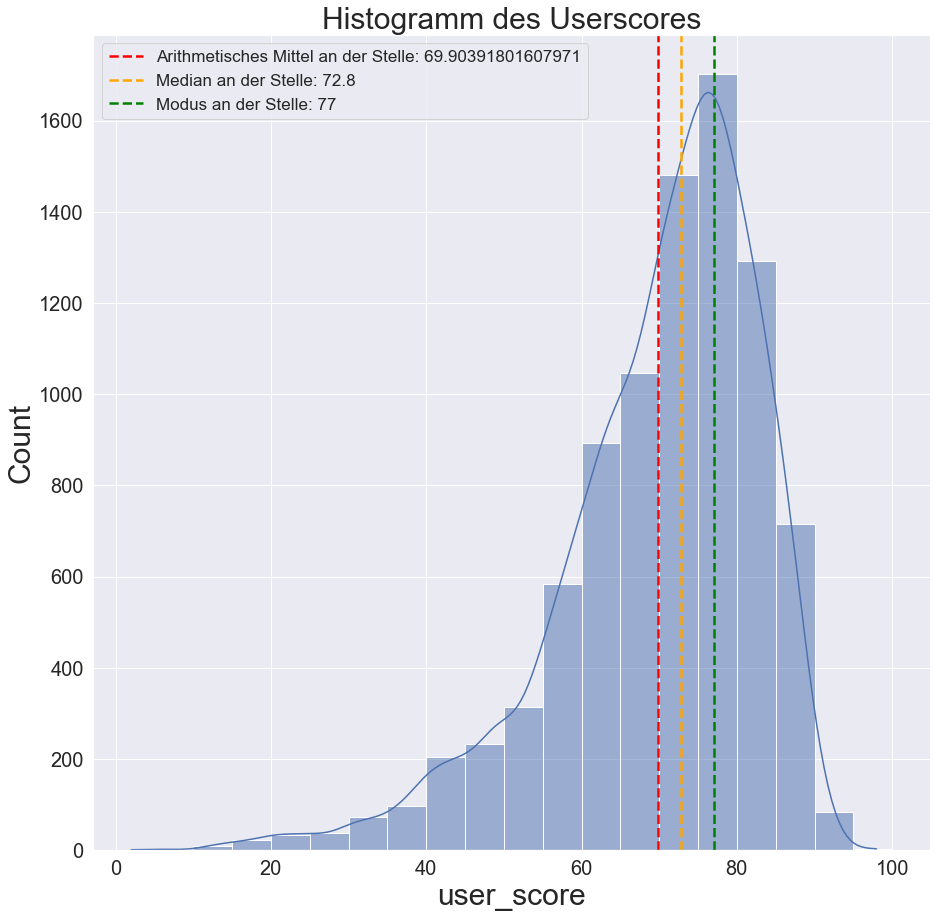

In [48]:
#Erstellt ein Histogram für die user_score-Spalte
sns.set(rc = {'figure.figsize':(15,15)})                                                     #Setzt die Größe der Grafik fest
sns.histplot(metacrit_data.user_score, binwidth=5, binrange=[10,100], kde=True)              #Erstellt Histogram mit einer Balkenbreite von 5 Skalenwerten und einer eingezeichneten Verteilungskurve
plt.xlabel("user_score", size=30)                                                            #Passt den Titel der x-Achse an und dessen größe 
plt.ylabel("Count", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
plt.tick_params(axis='both', which='major', labelsize=20)                                    #Passt die größe der x und y Achse an
plt.axvline(x=metacrit_data["user_score"].mean(),color='red',ls='--', lw=2.5, label=("Arithmetisches Mittel an der Stelle: "+str(metacrit_data["user_score"].mean())))                #Erstellt eine Gerade an der Stelle des arithmetischen Mittels
plt.axvline(x=metacrit_data["user_score"].median(),color='orange',ls='--', lw=2.5, label=("Median an der Stelle: "+str(metacrit_data["user_score"].median())))                        #Erstellt eine Gerade an der Stelle des Medians
plt.axvline(x=77,color='green',ls='--', lw=2.5, label="Modus an der Stelle: 77")                                                                                                      #Erstellt eine Gerade an der Stelle des Modus (manuell eingegeben)
plt.legend(loc='upper left', prop={'size': 17})
plt.title("Histogramm des Userscores", size=30)                                              #Setzt den Titel der Grafik und dessen Größe fest
plt.savefig("Pictures/histogram_userscore.jpg")                                              #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


In [49]:
#Gibt den Interquartils-Abstand der user_score-Spalte wieder
stats.iqr(metacrit_data["user_score"])

16.0

In [50]:
#Berechnung der Grenze des oberen und unteren Whiskers:
IQA=16
Q3=79
Q1=63
print("Obere Whisker Grenze: "+str(Q3+(IQA*1.5)))
print("Untere Whisker Grenze: "+str(Q1-(IQA*1.5)))
print("Unterer Grenzwert für Extremwerte: "+str(Q1-(IQA*3)))

Obere Whisker Grenze: 103.0
Untere Whisker Grenze: 39.0
Unterer Grenzwert für Extremwerte: 15


In [51]:
#Gibt die Anzahl an Reihen und damit die Anzahl an Fällen an, die unter den gesetzten Werten liegen
print(metacrit_data[(metacrit_data["user_score"]<39)].shape)
print(metacrit_data[(metacrit_data["user_score"]<15)].shape)

(256, 21)
(13, 21)


##### 3.2.3. Erstellung eines gemeinsamen Boxplots

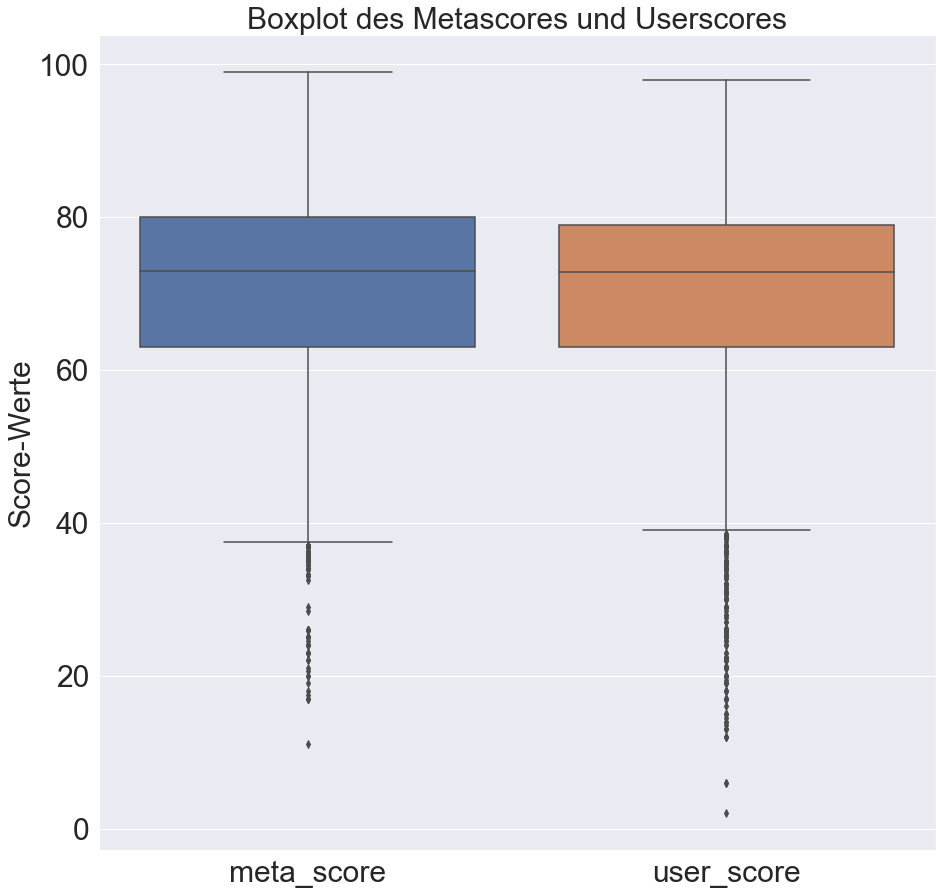

In [52]:
#Erstellt einen Boxplot für meta_score und user_score
sns.boxplot(data=metacrit_data[["meta_score", "user_score"]])                                                      
plt.ylabel("Score-Werte", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
plt.tick_params(axis='both', which='major', labelsize=30)                                    #Passt die größe der x und y Achse an
plt.title("Boxplot des Metascores und Userscores", size=30)                                  #Setzt den Titel der Grafik und dessen Größe fest
plt.savefig("Pictures/boxplot_metascore_and_userscore.jpg")                                  #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


##### 3.2.4: Niche Width

In [53]:
#Gibt für die unterschiedlichen Spalten mit NUR Zahlenwerten, bestimmte statistische Werte wieder.
metacrit_data.describe()

meta_score   user_score  niche_width  platform_width         year
count  8831.000000  8831.000000  8827.000000     8831.000000  7500.000000
mean     70.876621    69.903918     3.369208        1.363153  2009.493733
std      12.181944    13.161456     1.175403        0.722739     5.493037
min      11.000000     2.000000     1.000000        1.000000  1995.000000
25%      63.000000    63.000000     2.000000        1.000000  2005.000000
50%      73.000000    72.800000     3.000000        1.000000  2009.000000
75%      80.000000    79.000000     4.000000        2.000000  2014.000000
max      99.000000    98.000000    10.000000        9.000000  2018.000000

In [54]:
#Gibt an wie häufig ein einzigartiger Wert vorkommt. (Hieraus lässt sich der Modus ableiten)
metacrit_data["niche_width"].value_counts()

3.0     2862
2.0     2385
4.0     1973
5.0     1267
6.0      243
7.0       74
8.0       19
9.0        2
1.0        1
10.0       1
Name: niche_width, dtype: int64

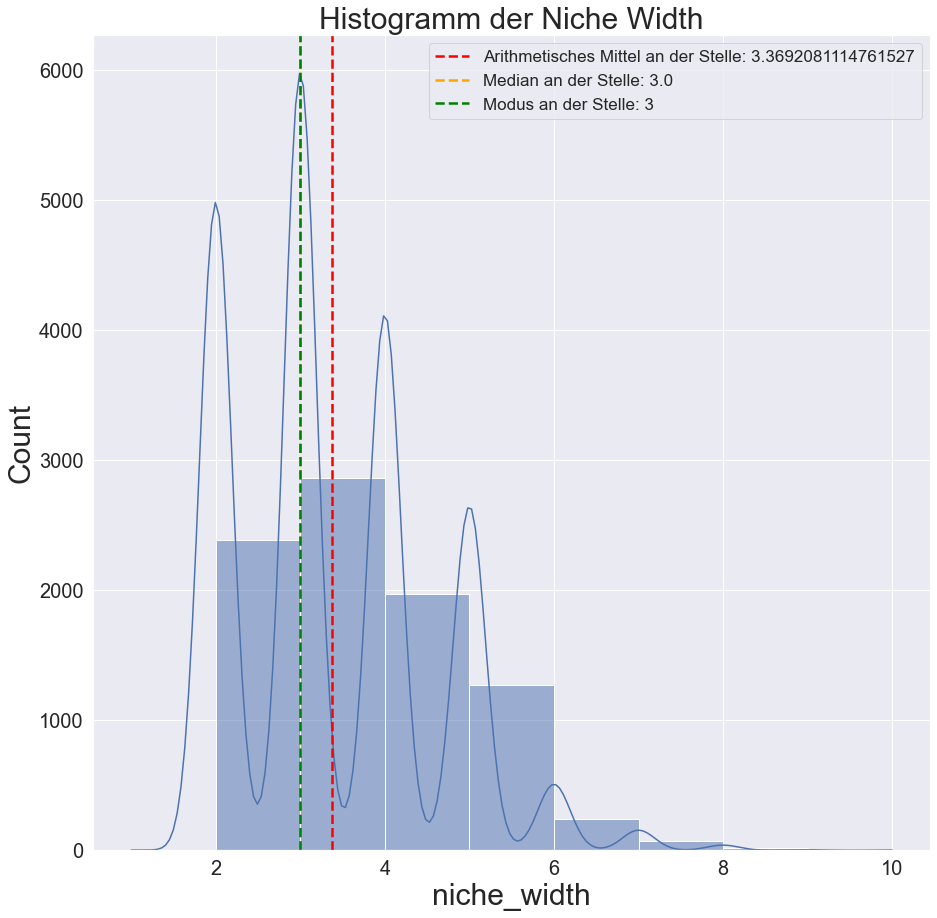

In [55]:
#Erstellt ein Histogram für die niche_width-Spalte
sns.set(rc = {'figure.figsize':(15,15)})                                                     #Setzt die Größe der Grafik fest
sns.histplot(metacrit_data.niche_width, binwidth=1, kde=True)              #Erstellt Histogram mit einer Balkenbreite von 1 Skalenwerten und einer eingezeichneten Verteilungskurve
plt.xlabel("niche_width", size=30)                                                            #Passt den Titel der x-Achse an und dessen größe 
plt.ylabel("Count", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
plt.tick_params(axis='both', which='major', labelsize=20)                                    #Passt die größe der x und y Achse an
plt.axvline(x=metacrit_data["niche_width"].mean(),color='red',ls='--', lw=2.5, label=("Arithmetisches Mittel an der Stelle: "+str(metacrit_data["niche_width"].mean())))                #Erstellt eine Gerade an der Stelle des arithmetischen Mittels
plt.axvline(x=metacrit_data["niche_width"].median(),color='orange',ls='--', lw=2.5, label=("Median an der Stelle: "+str(metacrit_data["niche_width"].median())))                        #Erstellt eine Gerade an der Stelle des Medians
plt.axvline(x=3,color='green',ls='--', lw=2.5, label="Modus an der Stelle: 3")                                                                                                      #Erstellt eine Gerade an der Stelle des Modus (manuell eingegeben)
plt.legend(loc='upper right', prop={'size': 17})
plt.title("Histogramm der Niche Width", size=30)                                              #Setzt den Titel der Grafik und dessen Größe fest
plt.savefig("Pictures/histogram_niche_width.jpg")                                              #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


In [56]:
#Fehlende Werte werden 0 gesetzt um rechnung zu ermöglichen
metacrit_data["niche_width"]=metacrit_data["niche_width"].replace(np.nan,0)

In [57]:
#Gibt den Interquartils-Abstand der user_score-Spalte wieder
stats.iqr(metacrit_data["niche_width"])

2.0

In [58]:
#0 wird wieder als fehlender Wert gesetzt
metacrit_data["niche_width"]=metacrit_data["niche_width"].replace(0,np.nan)

In [59]:
#Berechnung der Grenze des oberen und unteren Whiskers:
IQA=2
Q3=4
Q1=2
print("Obere Whisker Grenze: "+str(Q3+(IQA*1.5)))
print("Untere Whisker Grenze: "+str(Q1-(IQA*1.5)))
print("Oberer Grenzwert für Extremwerte: "+str(Q3+(IQA*3)))
print("Unterer Grenzwert für Extremwerte: "+str(Q1-(IQA*3)))

Obere Whisker Grenze: 7.0
Untere Whisker Grenze: -1.0
Oberer Grenzwert für Extremwerte: 10
Unterer Grenzwert für Extremwerte: -4


In [60]:
#Gibt die Anzahl an Reihen und damit die Anzahl an Fällen an, die unter den gesetzten Werten liegen
print("Zeigt die Anzahl an oberen Ausreißern an: " +str(metacrit_data[(metacrit_data["niche_width"]>7)].shape))
print("Zeigt die Anzahl an oberen Extremwerten an " +str(metacrit_data[(metacrit_data["niche_width"]>10)].shape))

Zeigt die Anzahl an oberen Ausreißern an: (22, 21)
Zeigt die Anzahl an oberen Extremwerten an (0, 21)


##### 3.2.5. Platform Width

In [61]:
#Gibt für die unterschiedlichen Spalten mit NUR Zahlenwerten, bestimmte statistische Werte wieder.
metacrit_data.describe()

meta_score   user_score  niche_width  platform_width         year
count  8831.000000  8831.000000  8827.000000     8831.000000  7500.000000
mean     70.876621    69.903918     3.369208        1.363153  2009.493733
std      12.181944    13.161456     1.175403        0.722739     5.493037
min      11.000000     2.000000     1.000000        1.000000  1995.000000
25%      63.000000    63.000000     2.000000        1.000000  2005.000000
50%      73.000000    72.800000     3.000000        1.000000  2009.000000
75%      80.000000    79.000000     4.000000        2.000000  2014.000000
max      99.000000    98.000000    10.000000        9.000000  2018.000000

In [62]:
#Gibt an wie häufig ein einzigartiger Wert vorkommt. (Hieraus lässt sich der Modus ableiten)
metacrit_data["platform_width"].value_counts()

1    6581
2    1538
3     528
4     137
5      38
6       6
7       2
9       1
Name: platform_width, dtype: int64

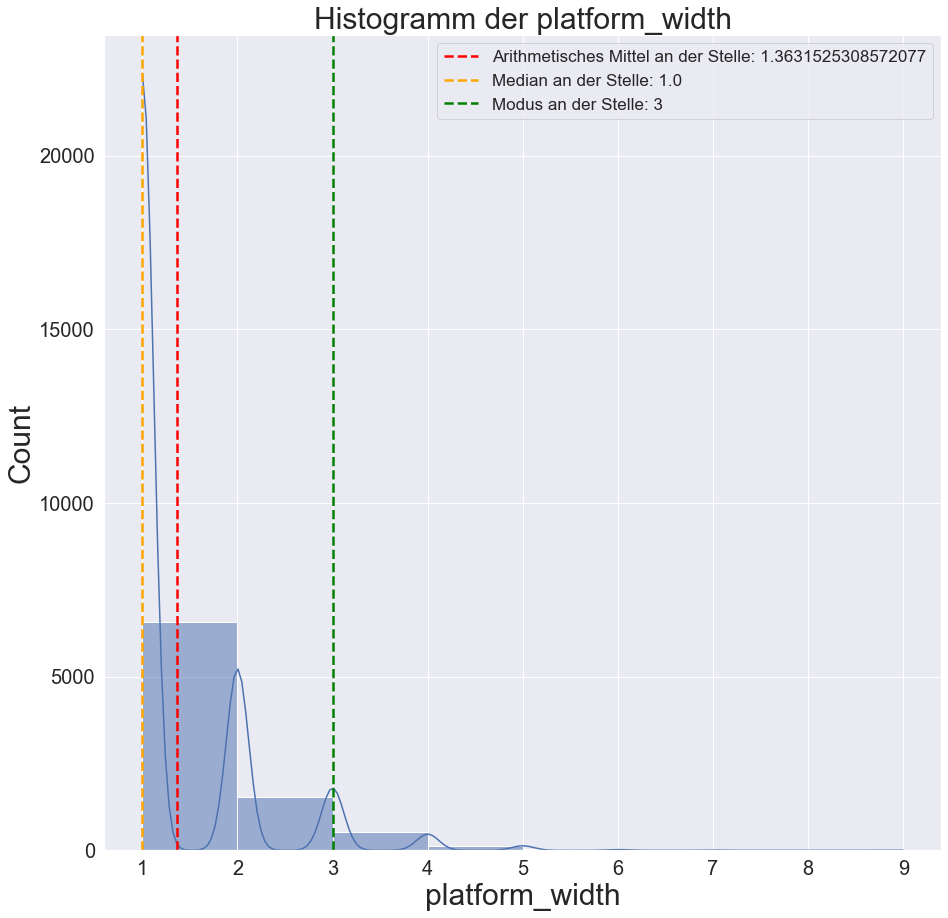

In [63]:
#Erstellt ein Histogram für die platform_width-Spalte
sns.set(rc = {'figure.figsize':(15,15)})                                                     #Setzt die Größe der Grafik fest
sns.histplot(metacrit_data.platform_width, binwidth=1, kde=True)              #Erstellt Histogram mit einer Balkenbreite von 1 Skalenwerten und einer eingezeichneten Verteilungskurve
plt.xlabel("platform_width", size=30)                                                            #Passt den Titel der x-Achse an und dessen größe 
plt.ylabel("Count", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
plt.tick_params(axis='both', which='major', labelsize=20)                                    #Passt die größe der x und y Achse an
plt.axvline(x=metacrit_data["platform_width"].mean(),color='red',ls='--', lw=2.5, label=("Arithmetisches Mittel an der Stelle: "+str(metacrit_data["platform_width"].mean())))                #Erstellt eine Gerade an der Stelle des arithmetischen Mittels
plt.axvline(x=metacrit_data["platform_width"].median(),color='orange',ls='--', lw=2.5, label=("Median an der Stelle: "+str(metacrit_data["platform_width"].median())))                        #Erstellt eine Gerade an der Stelle des Medians
plt.axvline(x=3,color='green',ls='--', lw=2.5, label="Modus an der Stelle: 3")                                                                                                      #Erstellt eine Gerade an der Stelle des Modus (manuell eingegeben)
plt.legend(loc='upper right', prop={'size': 17})
plt.title("Histogramm der platform_width", size=30)                                              #Setzt den Titel der Grafik und dessen Größe fest
plt.savefig("Pictures/histogram_platform_width.jpg")                                              #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


In [64]:
#Gibt den Interquartils-Abstand der user_score-Spalte wieder
stats.iqr(metacrit_data["platform_width"])

1.0

In [65]:
#Berechnung der Grenze des oberen und unteren Whiskers:
IQA=1
Q3=2
Q1=1
print("Obere Whisker Grenze: "+str(Q3+(IQA*1.5)))
print("Untere Whisker Grenze: "+str(Q1-(IQA*1.5)))
print("Oberer Grenzwert für Extremwerte: "+str(Q3+(IQA*3)))
print("Unterer Grenzwert für Extremwerte: "+str(Q1-(IQA*3)))

Obere Whisker Grenze: 3.5
Untere Whisker Grenze: -0.5
Oberer Grenzwert für Extremwerte: 5
Unterer Grenzwert für Extremwerte: -2


In [66]:
#Gibt die Anzahl an Reihen und damit die Anzahl an Fällen an, die unter den gesetzten Werten liegen
print("Zeigt die Anzahl an oberen Ausreißern an: " +str(metacrit_data[(metacrit_data["platform_width"]>3.5)].shape))
print("Zeigt die Anzahl an oberen Extremwerten an " +str(metacrit_data[(metacrit_data["platform_width"]>5)].shape))

Zeigt die Anzahl an oberen Ausreißern an: (184, 21)
Zeigt die Anzahl an oberen Extremwerten an (9, 21)


##### 3.2.6. Erscheinungsjahr

In [67]:
#Gibt für die unterschiedlichen Spalten mit NUR Zahlenwerten, bestimmte statistische Werte wieder.
metacrit_data.describe()

meta_score   user_score  niche_width  platform_width         year
count  8831.000000  8831.000000  8827.000000     8831.000000  7500.000000
mean     70.876621    69.903918     3.369208        1.363153  2009.493733
std      12.181944    13.161456     1.175403        0.722739     5.493037
min      11.000000     2.000000     1.000000        1.000000  1995.000000
25%      63.000000    63.000000     2.000000        1.000000  2005.000000
50%      73.000000    72.800000     3.000000        1.000000  2009.000000
75%      80.000000    79.000000     4.000000        2.000000  2014.000000
max      99.000000    98.000000    10.000000        9.000000  2018.000000

In [68]:
#Gibt an wie häufig ein einzigartiger Wert vorkommt. (Hieraus lässt sich der Modus ableiten)
metacrit_data["year"].value_counts()

2018.0    498
2017.0    473
2016.0    458
2009.0    454
2008.0    438
2007.0    420
2015.0    419
2006.0    406
2011.0    401
2010.0    381
2002.0    381
2005.0    375
2012.0    374
2003.0    371
2014.0    365
2013.0    355
2004.0    345
2001.0    283
2000.0    200
1998.0     33
1999.0     33
1997.0     20
1996.0     16
1995.0      1
Name: year, dtype: int64

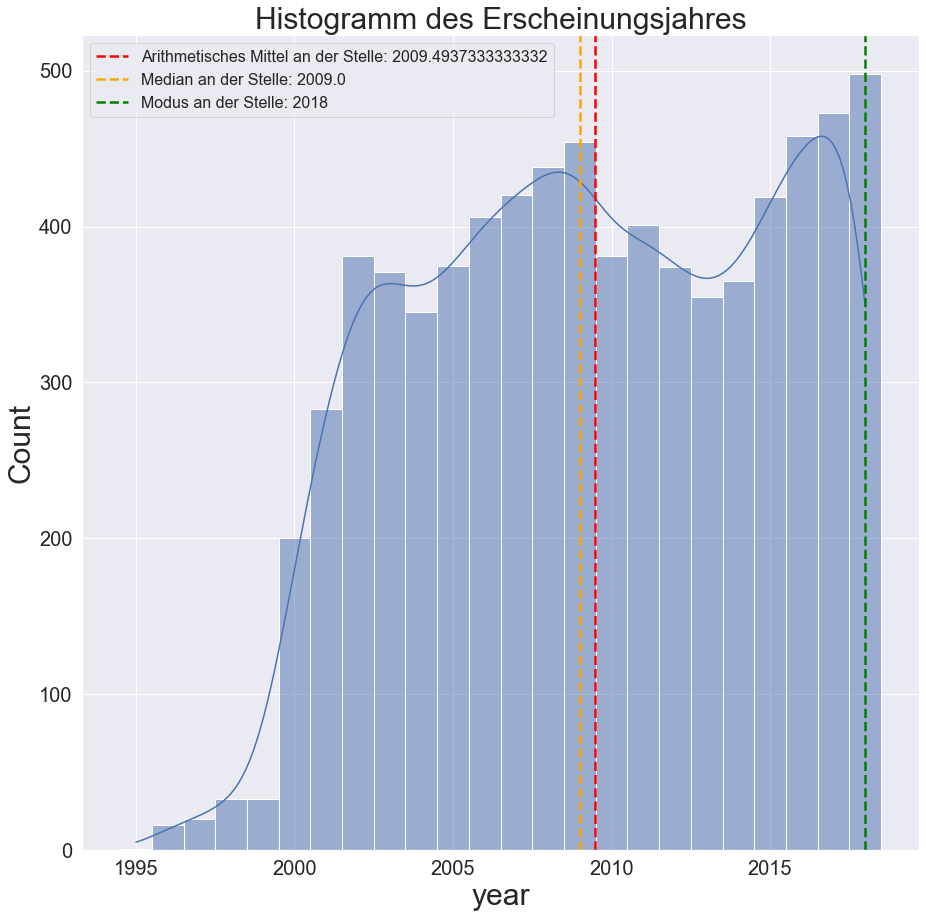

In [69]:
#Erstellt ein Histogram für die year-Spalte
sns.set(rc = {'figure.figsize':(15,15)})                                                     #Setzt die Größe der Grafik fest
sns.histplot(metacrit_data.year, discrete=True, kde=True)              #Erstellt Histogram mit einer Balkenbreite von 1 Skalenwerten und einer eingezeichneten Verteilungskurve
plt.xlabel("year", size=30)                                                            #Passt den Titel der x-Achse an und dessen größe 
plt.ylabel("Count", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
plt.tick_params(axis='both', which='major', labelsize=20)                                    #Passt die größe der x und y Achse an
plt.axvline(x=metacrit_data["year"].mean(),color='red',ls='--', lw=2.5, label=("Arithmetisches Mittel an der Stelle: "+str(metacrit_data["year"].mean())))                #Erstellt eine Gerade an der Stelle des arithmetischen Mittels
plt.axvline(x=metacrit_data["year"].median(),color='orange',ls='--', lw=2.5, label=("Median an der Stelle: "+str(metacrit_data["year"].median())))                        #Erstellt eine Gerade an der Stelle des Medians
plt.axvline(x=2018,color='green',ls='--', lw=2.5, label="Modus an der Stelle: 2018")                                                                                                      #Erstellt eine Gerade an der Stelle des Modus (manuell eingegeben)
plt.legend(loc='upper left', prop={'size': 16})
plt.title("Histogramm des Erscheinungsjahres", size=30)                                              #Setzt den Titel der Grafik und dessen Größe fest
plt.savefig("Pictures/histogram_year.jpg")                                              #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


In [70]:
#Fehlende Werte werden 0 gesetzt um rechnung zu ermöglichen
metacrit_data.describe()

meta_score   user_score  niche_width  platform_width         year
count  8831.000000  8831.000000  8827.000000     8831.000000  7500.000000
mean     70.876621    69.903918     3.369208        1.363153  2009.493733
std      12.181944    13.161456     1.175403        0.722739     5.493037
min      11.000000     2.000000     1.000000        1.000000  1995.000000
25%      63.000000    63.000000     2.000000        1.000000  2005.000000
50%      73.000000    72.800000     3.000000        1.000000  2009.000000
75%      80.000000    79.000000     4.000000        2.000000  2014.000000
max      99.000000    98.000000    10.000000        9.000000  2018.000000

In [71]:
#Gibt den Interquartils-Abstand der year-Spalte wieder
print(2014-2005)

9


In [72]:
#0 wird wieder als fehlender Wert gesetzt
metacrit_data["year"]=metacrit_data["year"].replace(0,np.nan)

In [73]:
#Berechnung der Grenze des oberen und unteren Whiskers:
IQA=9
Q3=2014
Q1=2005
print("Obere Whisker Grenze: "+str(Q3+(IQA*1.5)))
print("Untere Whisker Grenze: "+str(Q1-(IQA*1.5)))
print("Oberer Grenzwert für Extremwerte: "+str(Q3+(IQA*3)))
print("Unterer Grenzwert für Extremwerte: "+str(Q1-(IQA*3)))

Obere Whisker Grenze: 2027.5
Untere Whisker Grenze: 1991.5
Oberer Grenzwert für Extremwerte: 2041
Unterer Grenzwert für Extremwerte: 1978


##### 3.2.7. Names, Genre, Platform, Developer, Publisher, Release date

In [74]:
metacrit_data.columns

Index(['game_name', 'meta_score', 'user_score', 'platform', 'developer',
       'genre', 'publisher', 'release_date', 'genre1', 'genre2', 'genre3',
       'genre4', 'genre5', 'genre6', 'genre7', 'genre8', 'genre9', 'genre10',
       'niche_width', 'platform_width', 'year'],
      dtype='object')

Names:

In [75]:
#Gibt einen Einblick in die Werte, welche in der game_name-Spalte vorhanden sind. (Für mehr infos gesamten Datensatz anzeigen lassen)
metacrit_data["game_name"]

0       The Legend of Zelda: Ocarina of Time
1                         Super Mario Galaxy
2                       Super Mario Galaxy 2
3                              Metroid Prime
4                        Super Mario Odyssey
                        ...                 
8826                             kill.switch
8827                                  nail'd
8828                          oOo: Ascension
8829                            uDraw Studio
8830                                     xXx
Name: game_name, Length: 8831, dtype: object

Genres:

In [76]:
#Definiert eine Funktion, welche die Anzahl an Spielen abhängig ihrer Anzahl an Genres wiedergibt
def count_gen_only(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)]["game_name"].count()

In [77]:
#Setze die fehlenden Werte in den genre Spalten als 0 fest um Rechnungen zu ermöglichen
x=1
while x<11:
    metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].replace(np.nan, 0)
    x=x+1

In [78]:
#Zeigt auf wie viele Spiele NUR ein bzw. NUR zwei bzw. NUR drei usw. Genres haben
x=1
while x<10:
    print("Spiele mit "+str(x)+". Genre: "+str(count_gen_only(x)))
    x=x+1
print("Spiele mit 10. Genre: "+str(metacrit_data[(metacrit_data[("genre10")] != 0)]["game_name"].count()))

Spiele mit 1. Genre: 1
Spiele mit 2. Genre: 2385
Spiele mit 3. Genre: 2862
Spiele mit 4. Genre: 1973
Spiele mit 5. Genre: 1267
Spiele mit 6. Genre: 243
Spiele mit 7. Genre: 74
Spiele mit 8. Genre: 19
Spiele mit 9. Genre: 2
Spiele mit 10. Genre: 1


In [79]:
#Setze die 0 in den genre Spalten wieder als fehlenden Wert fest 
x=1
while x<11:
    metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].replace(0, np.nan)
    x=x+1

Platform:

In [80]:
#Gibt einen Einblick in die Werte, welche in der platform-Spalte vorhanden sind. (Für mehr infos gesamten Datensatz anzeigen lassen)
metacrit_data["platform"]

0                 ['nintendo-64']
1                         ['wii']
2                         ['wii']
3                    ['gamecube']
4                      ['switch']
                  ...            
8826    ['xbox', 'playstation-2']
8827                       ['pc']
8828                 ['xbox-one']
8829                      ['wii']
8830         ['game-boy-advance']
Name: platform, Length: 8831, dtype: object

Release Date:

In [81]:
#Gibt einen Einblick in die Werte, welche in der release_date-Spalte vorhanden sind. (Für mehr infos gesamten Datensatz anzeigen lassen)
metacrit_data["release_date"]

0       Nov 23, 1998
1       Nov 12, 2007
2       May 23, 2010
3       Nov 17, 2002
4       Oct 27, 2017
            ...     
8826    Oct 28, 2003
8827    Nov 30, 2010
8828    May 25, 2018
8829    Nov 14, 2010
8830    Jul 31, 2002
Name: release_date, Length: 8831, dtype: object

Developer: 

In [82]:
#Gibt einen Einblick in die Werte, welche in der developer-Spalte vorhanden sind. (Für mehr infos gesamten Datensatz anzeigen lassen)
metacrit_data["developer"]

0                  Nintendo
1                  Nintendo
2       Nintendo EAD Tokyo 
3             Retro Studios
4                  Nintendo
               ...         
8826                  Namco
8827               Techland
8828          Kenny Creanor
8829                    THQ
8830        Digital Eclipse
Name: developer, Length: 8831, dtype: object

Publisher:

In [83]:
#Gibt einen Einblick in die Werte, welche in der publisher-Spalte vorhanden sind. (Für mehr infos gesamten Datensatz anzeigen lassen)
metacrit_data["publisher"]

0                 Nintendo
1                 Nintendo
2                 Nintendo
3                 Nintendo
4                 Nintendo
               ...        
8826                 Namco
8827           Deep Silver
8828    Extra Mile Studios
8829                   THQ
8830            Activision
Name: publisher, Length: 8831, dtype: object

# PASST!!!

# 4. Prüfung der Daten: 

Stata Code:

Nachfolgend werden einige Untersuchungen mithilfe der Statistikanalysesoftware Stata durchgeführt. 
Ob Stata genutzt wird ist an einem "%stata" direkt vor dem Code oder einem "%%stata" am anfang der Code Zelle zu erkennen. Ein einfaches %-Zeichen sagt aus, dass der direkt dort hinterstehende Code von Stata ausgeführt wird. Ein doppeltes %-Zeichen sagt aus, dass der gesamte Code in der jeweiligen Code Zelle von Stata ausgeführt wird, auch wenn vor den einzelnen Code Absätzen kein "%Stata" steht. 

In [84]:
#Erstellt eine Kopie des metacrit_data-Dataframes, welcher an die nachfolgende Untersuchung angepasst werden kann, ohne den Hauptdatensatz zu verändern.
metacrit_data_hypo = metacrit_data.copy()

In [85]:
#Erstellt einen für Stata lesbare Datei mit den eingegebnen Spalten
metacrit_data_hypo[["game_name","meta_score","user_score","niche_width","platform_width","year", "publisher"]].to_stata('Stata/Stata_Data/stata_data_hypo.dta')

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  c:\Users\Marek\Documents\GitHub\BachelorThesis\Stata/Stata_Output/
> Stata_Output1.smcl
  log type:  smcl
 opened on:  29 Jan 2023, 04:36:48


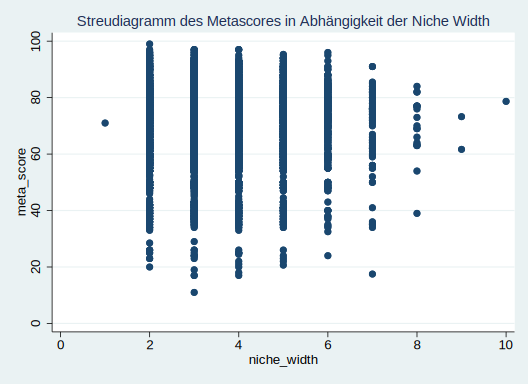

file Pictures/Stata/scatter_meta_niche.png written in PNG format


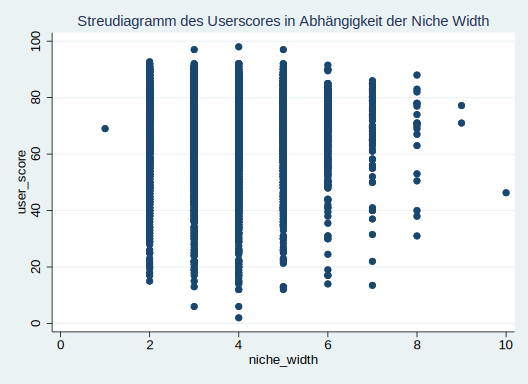

file Pictures/Stata/scatter_user_niche.png written in PNG format

             | meta_s~e user_s~e niche_~h platfo~h     year
-------------+---------------------------------------------
  meta_score |   1.0000 
             |
             |
  user_score |   0.5834*  1.0000 
             |   0.0000
             |
 niche_width |   0.0006  -0.0491*  1.0000 
             |   0.9587   0.0000
             |
platform_w~h |   0.1112*  0.0008   0.0147   1.0000 
             |   0.0000   0.9417   0.1670
             |
        year |   0.0074  -0.2158* -0.0461*  0.0489*  1.0000 
             |   0.5193   0.0000   0.0001   0.0000
             |

Skewness and kurtosis tests for normality
                                                         ----- Joint test -----
    Variable |       Obs   Pr(skewness)   Pr(kurtosis)   Adj chi2(2)  Prob>chi2
-------------+-----------------------------------------------------------------
  meta_score |     8,831         0.0000         0.0000        786.88     0.0

In [86]:
#METASCORE und USERSCORE:

#Erstellt eine Log-Datei, welche den Stata Output abspeichert
%stata log using Stata/Stata_Output/Stata_Output1, replace

#Liest den erstellten Datensatz in Stata ein
%stata use Stata/Stata_Data/stata_data_hypo

#Erstellt ein Streudiagramm mit dem Metascore als abhängige Variable und der Niche Width als unabhängige Variable 
%stata scatter meta_score niche_width, title(Streudiagramm des Metascores in Abhängigkeit der Niche Width, size(medium))
#Speichert die Grafik als jpg-Datei
%stata graph export Pictures/Stata/scatter_meta_niche.png, width(3840) replace

#Erstellt ein Streudiagramm mit dem Uetascore als abhängige Variable und der Niche Width als unabhängige Variable 
%stata scatter user_score niche_width, title(Streudiagramm des Userscores in Abhängigkeit der Niche Width, size(medium))
#Speichert die Grafik als jpg-Datei
%stata graph export Pictures/Stata/scatter_user_niche.png, width(3840) replace

#Erstellt eine Korrelations-Matrix 
%stata pwcorr meta_score user_score niche_width platform_width year, sig star(0.05)

#Überprüft ob die Schiefe der Variablen in einem aktzeptablen Bereich liegen, sodass die Annahme der Normalverteilung nicht verletzt wäre
%stata sktest meta_score
%stata sktest user_score

#Beendet das Log
%stata log close
#Schreibt den Stata Output in eine PDF-Datei um eine einfache Betrachtung zu ermöglichen
%stata translate Stata/Stata_Output/Stata_Output1.smcl Stata/Stata_Output/Stata_Output1.pdf
%stata clear

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  c:\Users\Marek\Documents\GitHub\BachelorThesis\Stata/Stata_Output/
> Stata_Output_restest.smcl
  log type:  smcl
 opened on:  29 Jan 2023, 04:36:57

      Source |       SS           df       MS      Number of obs   =     7,500
-------------+----------------------------------   F(3, 7496)      =     31.56
       Model |  14610.4254         3  4870.14181   Prob > F        =    0.0000
    Residual |   1156843.4     7,496  154.328095   R-squared       =    0.0125
-------------+----------------------------------   Adj R-squared   =    0.0121
       Total |  1171453.83     7,499  156.214672   Root MSE        =    12.423

------------------------------------------------------------------------------
  meta_score | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 niche_width |    .1736

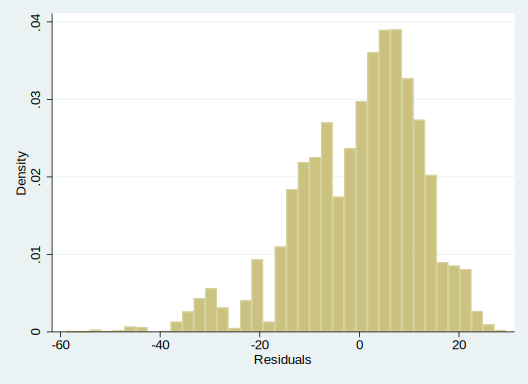

(bin=38, start=-56.213631, width=2.2277124)


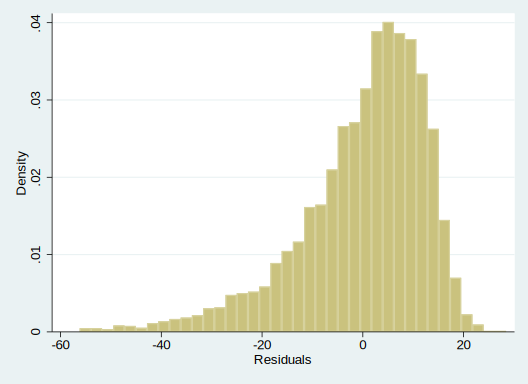

      name:  <unnamed>
       log:  c:\Users\Marek\Documents\GitHub\BachelorThesis\Stata/Stata_Output/
> Stata_Output_restest.smcl
  log type:  smcl
 closed on:  29 Jan 2023, 04:36:58
-------------------------------------------------------------------------------
file Stata/Stata_Output/_restest.pdf saved as PDF format


In [87]:
#METASCORE und USERSCORE:

#Erstellt eine Log-Datei, welche den Stata Output abspeichert
%stata log using Stata/Stata_Output/Stata_Output_restest, replace

#Liest den erstellten Datensatz in Stata ein
%stata use Stata/Stata_Data/stata_data_hypo

%stata regress meta_score niche_width platform_width year
%stata predict res_meta, resid
%stata sktest res_meta

%stata regress user_score niche_width platform_width year
%stata predict res_user, resid
%stata sktest res_user

%stata histogram res_meta
%stata histogram res_user
#Beendet das Log
%stata log close
#Schreibt den Stata Output in eine PDF-Datei um eine einfache Betrachtung zu ermöglichen
%stata translate Stata/Stata_Output/Stata_Output_restest.smcl Stata/Stata_Output/_restest.pdf
%stata clear

### 4.1. Mittelwerte pro möglicher Genre-Anzahl

In [88]:
# Setze die Missing Values in den genre Spalten als 0 fest um Rechnungen zu ermöglichen
x=1
while x<11:
    metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].replace(np.nan, 0)
    x=x+1

In [89]:
#Diese Funktionen geben das aritmethische Mittel oder den Median des Metascores bzw. Userscores in Abhänigkeit der Genre-Anzahl wieder.

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl:
def mean_gen_only_meta(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["meta_score"].mean()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def median_gen_only_meta(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["meta_score"].median()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def mean_gen_only_user(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["user_score"].mean()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def median_gen_only_user(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["user_score"].median()


In [90]:
#Gibt das aritmethische Mittel des Meta Scores für jede Genre-Anzahl an.
x=1
while x<10:
    print("Spiele mit "+ str(x),"Genre: ",mean_gen_only_meta(x))
    x=x+1
print("Spiele mit 10 Genre: " + str(metacrit_data[(metacrit_data["genre10"]!= 0)]["meta_score"].mean()) )



Spiele mit 1 Genre:  71.0
Spiele mit 2 Genre:  70.74314465408808
Spiele mit 3 Genre:  70.85366177498254
Spiele mit 4 Genre:  71.0050836289914
Spiele mit 5 Genre:  71.35331491712708
Spiele mit 6 Genre:  69.89884773662551
Spiele mit 7 Genre:  67.80864864864866
Spiele mit 8 Genre:  69.75421052631579
Spiele mit 9 Genre:  67.46000000000001
Spiele mit 10 Genre: 78.67


In [91]:
#Gibt den Median des Meta Scores für jede Genre-Anzahl an.
x=1
while x<10:
    print("genre"+ str(x), ": ",median_gen_only_meta(x))
    x=x+1
print("genre10 : " + str(metacrit_data[(metacrit_data["genre10"]!= 0)]["meta_score"].median()) )

genre1 :  71.0
genre2 :  73.0
genre3 :  73.0
genre4 :  74.0
genre5 :  74.0
genre6 :  73.0
genre7 :  72.75
genre8 :  70.0
genre9 :  67.46000000000001
genre10 : 78.67


In [92]:
#Gibt das aritmethische Mittel des User Scores für jede Genre-Anzahl an.
x=1
while x<10:
    print("genre"+ str(x), ": ",mean_gen_only_user(x))
    x=x+1
print("genre10 : " + str(metacrit_data[(metacrit_data["genre10"]!= 0)]["user_score"].mean()) )

genre1 :  69.0
genre2 :  70.49983228511532
genre3 :  70.3929769392033
genre4 :  69.07536746071973
genre5 :  69.63922651933702
genre6 :  67.62304526748973
genre7 :  67.0945945945946
genre8 :  66.01052631578948
genre9 :  74.1
genre10 : 46.3


In [93]:
#Gibt den Median des User Scores für jede Genre-Anzahl an.
x=1
while x<10:
    print("genre"+ str(x), ": ",median_gen_only_user(x))
    x=x+1
print("genre10 : " + str(metacrit_data[(metacrit_data["genre10"]!= 0)]["user_score"].median()) )

genre1 :  69.0
genre2 :  73.0
genre3 :  73.0
genre4 :  72.5
genre5 :  72.0
genre6 :  72.0
genre7 :  69.5
genre8 :  70.7
genre9 :  74.1
genre10 : 46.3


In [94]:
#Setze die 0 in den genre Spalten wieder als fehlenden Wert
x=1
while x<11:
    metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].replace(0, np.nan)
    x=x+1

### 4.2. Genrelisten


In [95]:
#Erstellt von jeder genre Spalte eine Liste mit den einzigartigen Genres der jeweiligen Spalte
genre1_list=metacrit_data["genre1"].unique().tolist()
genre2_list=metacrit_data["genre2"].unique().tolist()
genre3_list=metacrit_data["genre3"].unique().tolist()
genre4_list=metacrit_data["genre4"].unique().tolist()
genre5_list=metacrit_data["genre5"].unique().tolist()
genre6_list=metacrit_data["genre6"].unique().tolist()
genre7_list=metacrit_data["genre7"].unique().tolist()
genre8_list=metacrit_data["genre8"].unique().tolist()
genre9_list=metacrit_data["genre9"].unique().tolist()
genre10_list=metacrit_data["genre10"].unique().tolist()

In [96]:
#Erstellt aus den einzelnen Listen eine einzige Liste, bei der jedes einzigartige Genre nur einmal aufgelistet wird.
list_of_unique_genres=sorted(np.unique(genre1_list+genre2_list+genre3_list+genre4_list+genre5_list+genre6_list+genre7_list+genre8_list+genre9_list+genre10_list))
list_of_unique_genres.remove("nan")
list_of_unique_genres

['"Beat-Em-Up"',
 '"Shoot-Em-Up"',
 '2D',
 '3D',
 '4X',
 'Action',
 'ActionAdventure',
 'ActionRPG',
 'Adventure',
 'Alternative',
 'Application',
 'Arcade',
 'Artillery',
 'Athletics',
 'Automobile',
 'Baseball',
 'Basketball',
 'Biking',
 'Billiards',
 'Board/CardGame',
 'BoardGames',
 'Bowling',
 'Boxing',
 'Boxing/MartialArts',
 'Breeding/Constructing',
 'Business/Tycoon',
 'CarCombat',
 'CardBattle',
 'Career',
 'CityBuilding',
 'Civilian',
 'CivilianPlane',
 'Combat',
 'Command',
 'Compilation',
 'Console-styleRPG',
 'Cricket',
 'Dancing',
 'Defense',
 'DemolitionDerby',
 'Drag',
 'Driving',
 'Edutainment',
 'Exercise/Fitness',
 'Fantasy',
 'Fighting',
 'First-Person',
 'Fishing',
 'Flight',
 'Football',
 'FormulaOne',
 'Futuristic',
 'FuturisticJet',
 'FuturisticSub',
 'GT/Street',
 'Gambling',
 'General',
 'Golf',
 'Government',
 'Helicopter',
 'HiddenObject',
 'Historic',
 'Horizontal',
 'Horror',
 'HorseRacing',
 'Hunting',
 'IceHockey',
 'Individual',
 'InteractiveMovie',
 '

In [97]:
#Gibt die Länge der Genre Liste wieder
len(list_of_unique_genres)

168

In [98]:
#Gibt die Position des eigegebenen Genres ("Tank") wieder
list_of_unique_genres.index("Tank")

142

In [99]:
#Gibt das Genre an der eingegebenen Position (142) wieder
list_of_unique_genres[142]

'Tank'

In [100]:
#Erstellt 2 leere DataFrames, welche mit Werten "befüllt" werden können
data = {'genre': [],
        "count": [],
        'score_mean': [],
        'standard_deviation': [],
        'score_median': [],
        "nw_mean": [],
        "pw_mean": [],
        "y_mean": [],}

genre_meta_df = pd.DataFrame(data)
genre_user_df = pd.DataFrame(data)

In [101]:
metacrit_data["meta_score"].count()

8831

In [102]:
#Überträgt das Arithmetische Mittel und den Median des MetaScores je Genre (über 30 Fälle) in einen gesonderten DataFrame
x=1
while x<168:
    temp_df=metacrit_data[(metacrit_data["genre1"]==list_of_unique_genres[x]) | (metacrit_data["genre2"]==list_of_unique_genres[x]) | (metacrit_data["genre3"]==list_of_unique_genres[x]) | (metacrit_data["genre4"]==list_of_unique_genres[x]) | (metacrit_data["genre5"]==list_of_unique_genres[x]) | (metacrit_data["genre6"]==list_of_unique_genres[x]) | (metacrit_data["genre7"]==list_of_unique_genres[x]) | (metacrit_data["genre8"]==list_of_unique_genres[x]) | (metacrit_data["genre9"]==list_of_unique_genres[x]) | (metacrit_data["genre10"]==list_of_unique_genres[1])] #Erstellt einen temporären DataFrame, welcher jeden Fall abspeichert, der ein bestimmtes Genre in einer der Genrespalten enthält. (Kurzzeitig entsteht somit ein Dataframe mit allen Spielen, die das Genre Action enthalten)
    if len(temp_df)>30:
        genre_meta_df.loc[x,["genre","count", "score_mean","standard_deviation", "score_median", "nw_mean", "pw_mean", "y_mean"]] = [list_of_unique_genres[x], (temp_df["meta_score"].count()), (temp_df["meta_score"].mean()), (temp_df["meta_score"].std()), (temp_df["meta_score"].median()),(temp_df["niche_width"].mean()),(temp_df["platform_width"].mean()), (temp_df["year"].mean()) ]
        #print("Median für Genre " +str(list_of_unique_genres[x]) + ": " + str(temp_df["meta_score"].median()) )
        #print("Arithmetisches Mittel für Genre " +str(list_of_unique_genres[x]) + ": " + str(temp_df["meta_score"].mean()) )
    x=x+1
genre_meta_df

genre   count  score_mean  standard_deviation  score_median  \
1    "Shoot-Em-Up"   208.0   71.139856           10.508345        73.625   
2               2D   721.0   72.366449           11.457728        75.000   
3               3D   724.0   69.177707           12.115529        70.000   
4               4X    42.0   78.684524           11.146893        80.000   
5           Action  3125.0   69.995555           12.599483        72.000   
..             ...     ...         ...                 ...           ...   
158        Virtual   113.0   70.516195            9.701444        72.000   
159    VirtualLife    83.0   71.060241            9.942283        73.000   
160    VisualNovel    68.0   75.071029            9.756602        77.750   
166  Western-Style   118.0   75.196271           11.834628        77.000   
167      Wrestling    43.0   69.909070           12.736631        73.000   

      nw_mean   pw_mean       y_mean  
1    4.975962  1.264423  2012.276836  
2    3.374480  1.342580  2011.264803  
3    3.654696  1.378453  2009.652459  
4    3.761905  1.142857  2009.969697  
5    3.771200  1.374720  2010.042398  
..        ...       ...          ...  
158  4.115044  1.238938  2010.510204  
159  3.915663  1.204819  2009.027027  
160  2.558824  1.250000  2014.657143  
166  2.889831  1.313559  2010.076923  
167  4.209302  1.581395  2007.195122  

[91 rows x 8 columns]

In [103]:
genre_meta_df.sort_values("standard_deviation")

genre  count  score_mean  standard_deviation  score_median  \
80          Matching   55.0   73.316909            7.493816          74.0   
58        Government   48.0   73.937500            7.841939          75.0   
103  Point-and-Click  182.0   73.407912            8.541023          74.0   
28            Career   36.0   68.259167            9.353855          69.0   
62        Horizontal   49.0   73.513673            9.435273          76.0   
..               ...    ...         ...                 ...           ...   
85            Modern  458.0   69.410786           14.507861          72.0   
96       PC-styleRPG   42.0   72.801667           14.566230          75.0   
99    Party/Minigame   80.0   62.956250           15.123792          63.0   
88        Motorcycle   41.0   65.841463           15.378329          69.0   
98             Party   50.0   58.270000           16.388526          59.0   

      nw_mean   pw_mean       y_mean  
80   3.254545  1.254545  2007.711538  
58   4.354167  1.145833  2009.951220  
103  3.368132  1.357143  2012.754839  
28   4.333333  1.361111  2013.466667  
62   5.040816  1.306122  2012.564103  
..        ...       ...          ...  
85   4.327511  1.478166  2007.513274  
96   3.261905  1.142857  2006.023810  
99   3.175000  1.100000  2011.507692  
88   5.024390  1.390244  2006.390244  
98   3.080000  1.080000  2007.780000  

[91 rows x 8 columns]

In [104]:
#Überträgt das Arithmetische Mittel und den Median des UserScores je Genre (über 30 Fälle) in einen gesonderten DataFrame
x=1
while x<168:
    temp_df=metacrit_data[(metacrit_data["genre1"]==list_of_unique_genres[x]) | (metacrit_data["genre2"]==list_of_unique_genres[x]) | (metacrit_data["genre3"]==list_of_unique_genres[x]) | (metacrit_data["genre4"]==list_of_unique_genres[x]) | (metacrit_data["genre5"]==list_of_unique_genres[x]) | (metacrit_data["genre6"]==list_of_unique_genres[x]) | (metacrit_data["genre7"]==list_of_unique_genres[x]) | (metacrit_data["genre8"]==list_of_unique_genres[x]) | (metacrit_data["genre9"]==list_of_unique_genres[x]) | (metacrit_data["genre10"]==list_of_unique_genres[1])]
    if len(temp_df)>30:
        genre_user_df.loc[x,["genre", "count", "score_mean", "standard_deviation", "score_median","nw_mean", "pw_mean", "y_mean"]] = [list_of_unique_genres[x],(temp_df["meta_score"].count()), (temp_df["user_score"].mean()), (temp_df["user_score"].std()), (temp_df["user_score"].median()),(temp_df["niche_width"].mean()),(temp_df["platform_width"].mean()), (temp_df["year"].mean()) ]
        #print("Median für Genre " +str(list_of_unique_genres[x]) + ": " + str(temp_df["user_score"].median()) )
        #print("Arithmetisches Mittel für Genre " +str(list_of_unique_genres[x]) + ": " + str(temp_df["user_score"].mean()) )
    x=x+1
genre_user_df

genre   count  score_mean  standard_deviation  score_median  \
1    "Shoot-Em-Up"   208.0   69.948077           10.025783          72.0   
2               2D   721.0   71.209015           11.600374          73.0   
3               3D   724.0   70.176657           12.451702          72.0   
4               4X    42.0   73.138095           13.611813          77.0   
5           Action  3125.0   69.572160           13.017109          72.0   
..             ...     ...         ...                 ...           ...   
158        Virtual   113.0   66.085841           13.137167          70.0   
159    VirtualLife    83.0   66.102410           13.533004          71.0   
160    VisualNovel    68.0   72.194118           12.913477          75.0   
166  Western-Style   118.0   71.853390           13.053340          75.0   
167      Wrestling    43.0   70.630233           14.572635          73.0   

      nw_mean   pw_mean       y_mean  
1    4.975962  1.264423  2012.276836  
2    3.374480  1.342580  2011.264803  
3    3.654696  1.378453  2009.652459  
4    3.761905  1.142857  2009.969697  
5    3.771200  1.374720  2010.042398  
..        ...       ...          ...  
158  4.115044  1.238938  2010.510204  
159  3.915663  1.204819  2009.027027  
160  2.558824  1.250000  2014.657143  
166  2.889831  1.313559  2010.076923  
167  4.209302  1.581395  2007.195122  

[91 rows x 8 columns]

In [105]:
genre_meta_df.sort_values("score_mean")

genre  count  score_mean  standard_deviation  score_median  \
98            Party   50.0   58.270000           16.388526        59.000   
99   Party/Minigame   80.0   62.956250           15.123792        63.000   
95            Other   50.0   64.588400           12.822850        64.335   
84    Mission-based   35.0   64.742857           11.137039        64.000   
154          Tycoon   44.0   65.011364           12.608823        64.500   
..              ...    ...         ...                 ...           ...   
128          Soccer  101.0   75.684554           11.959374        78.500   
49         Football   77.0   76.307403           10.248677        78.000   
118             Sim  289.0   76.469412           10.164461        79.000   
66        IceHockey   45.0   76.474000            9.493991        79.000   
4                4X   42.0   78.684524           11.146893        80.000   

      nw_mean   pw_mean       y_mean  
98   3.080000  1.080000  2007.780000  
99   3.175000  1.100000  2011.507692  
95   4.660000  1.380000  2008.808511  
84   3.342857  1.685714  2005.000000  
154  3.977273  1.068182  2005.909091  
..        ...       ...          ...  
128  4.514851  1.900990  2009.032967  
49   4.506494  1.896104  2006.297297  
118  4.484429  1.871972  2006.904059  
66   4.511111  1.444444  2007.317073  
4    3.761905  1.142857  2009.969697  

[91 rows x 8 columns]

In [106]:
genre_meta_df.sort_values("score_median")

genre  count  score_mean  standard_deviation  score_median  \
98            Party   50.0   58.270000           16.388526        59.000   
99   Party/Minigame   80.0   62.956250           15.123792        63.000   
84    Mission-based   35.0   64.742857           11.137039        64.000   
95            Other   50.0   64.588400           12.822850        64.335   
154          Tycoon   44.0   65.011364           12.608823        64.500   
..              ...    ...         ...                 ...           ...   
15         Baseball   66.0   75.666515            9.482392        78.000   
128          Soccer  101.0   75.684554           11.959374        78.500   
66        IceHockey   45.0   76.474000            9.493991        79.000   
118             Sim  289.0   76.469412           10.164461        79.000   
4                4X   42.0   78.684524           11.146893        80.000   

      nw_mean   pw_mean       y_mean  
98   3.080000  1.080000  2007.780000  
99   3.175000  1.100000  2011.507692  
84   3.342857  1.685714  2005.000000  
95   4.660000  1.380000  2008.808511  
154  3.977273  1.068182  2005.909091  
..        ...       ...          ...  
15   4.409091  1.439394  2007.419355  
128  4.514851  1.900990  2009.032967  
66   4.511111  1.444444  2007.317073  
118  4.484429  1.871972  2006.904059  
4    3.761905  1.142857  2009.969697  

[91 rows x 8 columns]

In [107]:
genre_user_df.sort_values("score_mean")

genre  count  score_mean  standard_deviation  score_median  \
143              Team  223.0   62.000897           16.982163         68.00   
98              Party   50.0   63.240000           16.058643         67.50   
99     Party/Minigame   80.0   63.856250           14.105209         66.50   
155           Vehicle   54.0   64.394444           13.245781         67.75   
67         Individual  185.0   64.419459           14.392603         67.00   
..                ...    ...         ...                 ...           ...   
69     Japanese-Style  183.0   73.446448           10.597210         75.00   
33            Command   45.0   74.022222           14.389846         75.00   
132            Static   31.0   74.677419            8.780232         77.00   
34        Compilation  208.0   74.679808           10.625940         77.00   
35   Console-styleRPG  166.0   77.777108           11.423727         81.00   

      nw_mean   pw_mean       y_mean  
143  4.704036  1.663677  2010.821429  
98   3.080000  1.080000  2007.780000  
99   3.175000  1.100000  2011.507692  
155  4.462963  1.148148  2010.976744  
67   4.556757  1.464865  2010.165644  
..        ...       ...          ...  
69   2.819672  1.240437  2012.555556  
33   4.288889  1.022222  2006.775000  
132  5.225806  1.161290  2009.000000  
34   3.067308  1.432692  2010.477987  
35   2.686747  1.126506  2006.606061  

[91 rows x 8 columns]

In [108]:
genre_user_df.sort_values("score_median")

genre  count  score_mean  standard_deviation  score_median  \
66          IceHockey   45.0   65.182222           14.821549         66.50   
99     Party/Minigame   80.0   63.856250           14.105209         66.50   
67         Individual  185.0   64.419459           14.392603         67.00   
98              Party   50.0   63.240000           16.058643         67.50   
155           Vehicle   54.0   64.394444           13.245781         67.75   
..                ...    ...         ...                 ...           ...   
34        Compilation  208.0   74.679808           10.625940         77.00   
4                  4X   42.0   73.138095           13.611813         77.00   
132            Static   31.0   74.677419            8.780232         77.00   
63             Horror  140.0   73.255000           13.269104         77.50   
35   Console-styleRPG  166.0   77.777108           11.423727         81.00   

      nw_mean   pw_mean       y_mean  
66   4.511111  1.444444  2007.317073  
99   3.175000  1.100000  2011.507692  
67   4.556757  1.464865  2010.165644  
98   3.080000  1.080000  2007.780000  
155  4.462963  1.148148  2010.976744  
..        ...       ...          ...  
34   3.067308  1.432692  2010.477987  
4    3.761905  1.142857  2009.969697  
132  5.225806  1.161290  2009.000000  
63   3.064286  1.464286  2007.927007  
35   2.686747  1.126506  2006.606061  

[91 rows x 8 columns]

In [109]:
genre_user_df.sort_values("count")

genre   count  score_mean  standard_deviation  score_median  \
132           Static    31.0   74.677419            8.780232         77.00   
30          Civilian    34.0   65.647059           14.274521         69.35   
84     Mission-based    35.0   66.757143           11.939265         69.00   
28            Career    36.0   65.477778           13.800644         69.75   
129            Space    38.0   67.715789           13.973595         69.85   
..               ...     ...         ...                 ...           ...   
111     Role-Playing  1059.0   72.777904           12.767690         76.00   
117          Shooter  1101.0   68.393824           14.387558         71.50   
6    ActionAdventure  1208.0   70.636258           13.131020         73.00   
56           General  2488.0   68.706592           12.766157         71.00   
5             Action  3125.0   69.572160           13.017109         72.00   

      nw_mean   pw_mean       y_mean  
132  5.225806  1.161290  2009.000000  
30   4.323529  1.205882  2007.629630  
84   3.342857  1.685714  2005.000000  
28   4.333333  1.361111  2013.466667  
129  4.736842  1.105263  2007.742857  
..        ...       ...          ...  
111  2.676110  1.278565  2010.218310  
117  4.784741  1.417802  2009.374486  
6    3.004967  1.587748  2010.654886  
56   3.305466  1.293810  2010.783230  
5    3.771200  1.374720  2010.042398  

[91 rows x 8 columns]

In [110]:
genre_user_df["count"].mean()

312.8131868131868

Stata Code:

Nachfolgend werden einige Untersuchungen mithilfe der Statistikanalysesoftware Stata durchgeführt. 
Ob Stata genutzt wird ist an einem "%stata" direkt vor dem Code oder einem "%%stata" am anfang der Code Zelle zu erkennen. Ein einfaches %-Zeichen sagt aus, dass der direkt dort hinterstehende Code von Stata ausgeführt wird. Ein doppeltes %-Zeichen sagt aus, dass der gesamte Code in der jeweiligen Code Zelle von Stata ausgeführt wird, auch wenn vor den einzelnen Code Absätzen kein "%Stata" steht. 

In [111]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Erstellt eine Kopie des metacrit_data-Dataframes, welcher an die nachfolgende Untersuchung angepasst werden kann, ohne den Hauptdatensatz zu verändern.
genre_meta_df_hypo = genre_meta_df.copy()
genre_user_df_hypo = genre_user_df.copy()


In [112]:
genre_meta_df_hypo.to_stata('Stata/Stata_Data/stata_data_genre_meta_hypo.dta')
genre_user_df_hypo.to_stata('Stata/Stata_Data/stata_data_genre_user_hypo.dta')

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  c:\Users\Marek\Documents\GitHub\BachelorThesis\Stata/Stata_Output/
> Stata_Output_genremetahypo.smcl
  log type:  smcl
 opened on:  29 Jan 2023, 04:37:02


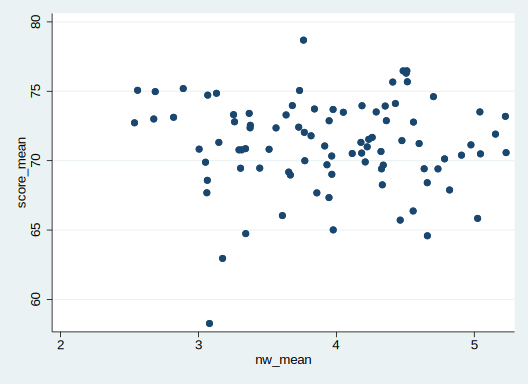


             | scor~ean  nw_mean  pw_mean   y_mean
-------------+------------------------------------
  score_mean |   1.0000 
             |
             |
     nw_mean |  -0.0245   1.0000 
             |   0.8175
             |
     pw_mean |   0.2065*  0.1722   1.0000 
             |   0.0495   0.1026
             |
      y_mean |   0.0790  -0.1860  -0.1324   1.0000 
             |   0.4568   0.0775   0.2108
             |
      name:  <unnamed>
       log:  c:\Users\Marek\Documents\GitHub\BachelorThesis\Stata/Stata_Output/
> Stata_Output_genremetahypo.smcl
  log type:  smcl
 closed on:  29 Jan 2023, 04:37:03
-------------------------------------------------------------------------------
file Stata/Stata_Output/Stata_Output_genremetahypo.pdf saved as PDF format


In [113]:
#METASCORE:

#Erstellt eine Log-Datei, welche den Stata Output abspeichert
%stata log using Stata/Stata_Output/Stata_Output_genremetahypo, replace

#Liest den erstellten Datensatz in Stata ein
%stata use Stata/Stata_Data/stata_data_genre_meta_hypo.dta

#Erstellt ein Streudiagramm mit dem Metascore als abhängige Variable und der Niche Width als unabhängige Variable 
%stata scatter score_mean nw_mean 
#title(Streudiagramm des Metascores in Abhängigkeit der Niche Width, size(medium))
#Speichert die Grafik als jpg-Datei
#%stata graph export Pictures/Stata/scatter_genremeta_niche.png, width(3840) replace

#Erstellt eine Korrelations-Matrix 
%stata pwcorr score_mean nw_mean pw_mean y_mean, sig star(0.05)

#Beendet das Log
%stata log close
#Schreibt den Stata Output in eine PDF-Datei um eine einfache Betrachtung zu ermöglichen
%stata translate Stata/Stata_Output/Stata_Output_genremetahypo.smcl Stata/Stata_Output/Stata_Output_genremetahypo.pdf
%stata clear

In [114]:
#METASCORE und USERSCORE:

#Erstellt eine Log-Datei, welche den Stata Output abspeichert
%stata log using Stata/Stata_Output/Stata_Output_restest, replace

#Liest den erstellten Datensatz in Stata ein
%stata use Stata/Stata_Data/stata_data_hypo

%stata regress meta_score niche_width platform_width year
%stata predict res_meta, resid
%stata sktest res_meta

%stata regress user_score niche_width platform_width year
%stata predict res_user, resid
%stata sktest res_user

#Beendet das Log
%stata log close
#Schreibt den Stata Output in eine PDF-Datei um eine einfache Betrachtung zu ermöglichen
%stata translate Stata/Stata_Output/Stata_Output_restest.smcl Stata/Stata_Output/_restest.pdf

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  c:\Users\Marek\Documents\GitHub\BachelorThesis\Stata/Stata_Output/
> Stata_Output_restest.smcl
  log type:  smcl
 opened on:  29 Jan 2023, 04:37:03

      Source |       SS           df       MS      Number of obs   =     7,500
-------------+----------------------------------   F(3, 7496)      =     31.56
       Model |  14610.4254         3  4870.14181   Prob > F        =    0.0000
    Residual |   1156843.4     7,496  154.328095   R-squared       =    0.0125
-------------+----------------------------------   Adj R-squared   =    0.0121
       Total |  1171453.83     7,499  156.214672   Root MSE        =    12.423

------------------------------------------------------------------------------
  meta_score | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 niche_width |    .1736

In [115]:
#Erstellt einen Datenframe, in welchem nur Entwickler enthalten sind, die mehr als 30 mal vorkommen
counted = metacrit_data.groupby(["developer"]).size().reset_index(name='counts')
groupdev= metacrit_data[metacrit_data["developer"].isin(counted[counted.counts > 30].developer)]

In [116]:
#Der neu erstellte Datenframe wird nach den Entwicklern gruppiert und der Median des Metascores der Gurppe wird ausgegeben
groupdev.groupby(["developer"])["meta_score"].median().sort_values()

developer
From Software             68.000
Omega Force               69.000
Ubisoft                   70.000
Konami                    70.000
Vicarious Visions         71.000
Level 5                   74.000
Nippon Ichi Software      74.000
Namco                     74.500
Electronic Arts           75.000
Bandai Namco Games        75.500
Arc System Works          75.750
Ubisoft Montreal          75.835
Sega                      76.000
Square Enix               76.000
Telltale Games            76.000
Maxis                     76.500
Capcom                    77.000
EA Canada                 77.500
EA Tiburon                79.000
EA Sports                 80.000
Nintendo                  81.000
Codemasters               81.335
Visual Concepts           83.000
Blizzard Entertainment    87.000
Name: meta_score, dtype: float64

In [117]:
#Der neu erstellte Datenframe wird nach den Entwicklern gruppiert und das arithmetische Mittel des Metascores der Gurppe wird ausgegeben
groupdev.groupby(["developer"])["meta_score"].mean().sort_values()

developer
Ubisoft                   67.122000
Omega Force               67.271373
Konami                    68.616163
Bandai Namco Games        68.765952
From Software             69.276774
Vicarious Visions         70.516129
Nippon Ichi Software      72.388889
Arc System Works          73.171053
Square Enix               73.355263
Sega                      73.587719
Ubisoft Montreal          74.107097
Capcom                    74.198400
Namco                     74.403421
Level 5                   74.642857
Electronic Arts           74.820222
Telltale Games            76.024038
EA Canada                 76.088500
Maxis                     76.416765
EA Tiburon                77.412000
EA Sports                 78.887273
Codemasters               79.300556
Nintendo                  79.580769
Visual Concepts           79.588485
Blizzard Entertainment    85.215161
Name: meta_score, dtype: float64

# Mehr Drittvariablen

### Top 10 Genres

In [118]:
#Erstellt eine Liste mit den Top 10 Genres nach dem durchschnittlichen Metascore
top10_meta_genres=((genre_meta_df.sort_values("score_mean",ascending=False)).head(n=10))["genre"].tolist()
top10_meta_genres

['4X',
 'IceHockey',
 'Sim',
 'Football',
 'Soccer',
 'Baseball',
 'Western-Style',
 'VisualNovel',
 'MassivelyMultiplayer',
 'Console-styleRPG']

In [119]:
#Erstellt eine Liste mit den Indexwerten des jeweiligen Falles, wenn dieser in der jeweiligen Genre Spalte eines der Top10 Genres aufweist
positions1=list(metacrit_data[metacrit_data["genre1"].isin(top10_meta_genres)].index.values)
positions2=list(metacrit_data[metacrit_data["genre2"].isin(top10_meta_genres)].index.values)
positions3=list(metacrit_data[metacrit_data["genre3"].isin(top10_meta_genres)].index.values)
positions4=list(metacrit_data[metacrit_data["genre4"].isin(top10_meta_genres)].index.values)
positions5=list(metacrit_data[metacrit_data["genre5"].isin(top10_meta_genres)].index.values)
positions6=list(metacrit_data[metacrit_data["genre6"].isin(top10_meta_genres)].index.values)
positions7=list(metacrit_data[metacrit_data["genre7"].isin(top10_meta_genres)].index.values)
positions8=list(metacrit_data[metacrit_data["genre8"].isin(top10_meta_genres)].index.values)
positions9=list(metacrit_data[metacrit_data["genre9"].isin(top10_meta_genres)].index.values)
positions10=list(metacrit_data[metacrit_data["genre10"].isin(top10_meta_genres)].index.values)

positions_meta=np.unique(positions1+positions2+positions3+positions4+positions5+positions6+positions7+positions8+positions9+positions10)

In [120]:
#Erstellt eine Liste mit den Top 10 Genres nach dem durchschnittlichen Userscore
top10_user_genres=((genre_user_df.sort_values("score_mean",ascending=False)).head(n=10))["genre"].tolist()
top10_user_genres

['Console-styleRPG',
 'Compilation',
 'Static',
 'Command',
 'Japanese-Style',
 'Horror',
 'Fantasy',
 '4X',
 'ActionRPG',
 'Matching']

In [121]:
#Erstellt eine Liste mit den Indexwerten des jeweiligen Falles, wenn dieser in der jeweiligen Genre Spalte eines der Top10 Genres aufweist
positions1=list(metacrit_data[metacrit_data["genre1"].isin(top10_user_genres)].index.values)
positions2=list(metacrit_data[metacrit_data["genre2"].isin(top10_user_genres)].index.values)
positions3=list(metacrit_data[metacrit_data["genre3"].isin(top10_user_genres)].index.values)
positions4=list(metacrit_data[metacrit_data["genre4"].isin(top10_user_genres)].index.values)
positions5=list(metacrit_data[metacrit_data["genre5"].isin(top10_user_genres)].index.values)
positions6=list(metacrit_data[metacrit_data["genre6"].isin(top10_user_genres)].index.values)
positions7=list(metacrit_data[metacrit_data["genre7"].isin(top10_user_genres)].index.values)
positions8=list(metacrit_data[metacrit_data["genre8"].isin(top10_user_genres)].index.values)
positions9=list(metacrit_data[metacrit_data["genre9"].isin(top10_user_genres)].index.values)
positions10=list(metacrit_data[metacrit_data["genre10"].isin(top10_user_genres)].index.values)

positions_user=np.unique(positions1+positions2+positions3+positions4+positions5+positions6+positions7+positions8+positions9+positions10)

In [122]:
#Gibt die länger der Listen wieder
print(len(positions_user))
print(len(positions_meta))

1715
856


In [123]:
#Erstellt zwei neue Spalten, welche jeweils mit 0 an jeder Stelle ausgefüllt werden
metacrit_data["top10_genre_meta"]=0
metacrit_data["top10_genre_user"]=0

In [124]:
#Schreibt eine 1 in die Spalte "top10_genre_meta", wenn die Position in der Postionsliste auftaucht
x=0
while x<856:
    metacrit_data.loc[positions_meta[x], "top10_genre_meta"]=1
    x=x+1


In [125]:
#Schreibt eine 1 in die Spalte "top10_genre_user", wenn die Position in der Postionsliste auftaucht
x=0
while x<1715:
    metacrit_data.loc[positions_user[x], "top10_genre_user"]=1
    x=x+1


### Top 10 Publischer

In [126]:
#Erstellt eine Liste mit allen einzigartigen Publischern
metacrit_data["publisher"]=metacrit_data["publisher"].replace(np.nan, 0)
publisher_list=metacrit_data["publisher"].unique().tolist()
publisher_list.remove(0)
metacrit_data["publisher"]=metacrit_data["publisher"].replace(0, np.nan)
#publisher_list

['Nintendo',
 'Microsoft Game Studios',
 'Sega',
 'SCEA',
 'Namco',
 'Konami',
 'Rockstar Games',
 'Interplay',
 'Square EA',
 'MicroProse',
 'Tecmo',
 'LucasArts',
 'Blizzard Entertainment',
 '2K Games',
 'THQ',
 'Larian Studios Games',
 'Atari',
 'Mojang AB',
 'Atlus',
 'Sierra Entertainment',
 'Infogrames',
 'SCEE',
 'Electronic Arts',
 'Looking Glass Studios',
 'Square Enix',
 'Activision',
 'Eidos Interactive',
 'Stardock',
 'Rare Ltd.',
 'Out Of The Park Developments',
 'Bethesda Softworks',
 'Bungie Software',
 'RedOctane',
 'Ubisoft',
 'Psygnosis',
 'Capcom',
 'PopCap',
 'Cardboard Computer',
 'EA Games',
 'Funcom',
 'Image & Form',
 'Yacht Club Games',
 '989 Studios',
 'increpare',
 'EA Sports',
 'Valve Software',
 'VU Games',
 'Atlus Co.',
 'Team Cherry',
 'Bizarre Creations',
 'Graphsim Entertainment',
 'Zen Studios',
 'Warner Bros. Interactive Entertainment',
 'Focus Home Interactive',
 'Monolith Productions',
 'Blendo Games',
 'Namco Bandai Games America',
 'Galactic Cafe'

In [127]:
len(publisher_list)

1163

In [128]:
#Erstellt 2 leere DataFrames, welche mit Werten "befüllt" werden können
data = {'publisher': [],
        "count": [],
        'score_mean': [],
        'standard_deviation': [],
        'score_median': [],
        "nw_mean": [],
        "pw_mean": [],
        "y_mean": [],}

publisher_meta_df = pd.DataFrame(data)
publisher_user_df = pd.DataFrame(data)

In [129]:
#Erstellt einen Dataframe für Publisher, die über 30 vorkommen.
x=0
while x<1163:
    temp_df=metacrit_data[metacrit_data["publisher"]==publisher_list[x] ]
    if len(temp_df)>30:
        publisher_meta_df.loc[x,["publisher","count", "score_mean","standard_deviation", "score_median", "nw_mean", "pw_mean", "y_mean"]] = [publisher_list[x], (temp_df["meta_score"].count()), (temp_df["meta_score"].mean()), (temp_df["meta_score"].std()), (temp_df["meta_score"].median()),(temp_df["niche_width"].mean()),(temp_df["platform_width"].mean()), (temp_df["year"].mean()) ]
    x=x+1
#publisher_meta_df

In [130]:
#Erstellt einen Dataframe für Publisher, die über 30 vorkommen.
x=0
while x<1163:
    temp_df=metacrit_data[metacrit_data["publisher"]==publisher_list[x] ]
    if len(temp_df)>30:
        publisher_user_df.loc[x,["publisher","count", "score_mean","standard_deviation", "score_median", "nw_mean", "pw_mean", "y_mean"]] = [publisher_list[x], (temp_df["user_score"].count()), (temp_df["user_score"].mean()), (temp_df["user_score"].std()), (temp_df["user_score"].median()),(temp_df["niche_width"].mean()),(temp_df["platform_width"].mean()), (temp_df["year"].mean()) ]
    x=x+1
#publisher_user_df

In [131]:
#Erstellt eine Liste mit den Top 10 Publshern nach Metascore
top10_meta_publisher=((publisher_meta_df.sort_values("score_mean",ascending=False)).head(n=10))["publisher"].tolist()
top10_meta_publisher

['Rockstar Games',
 'EA Sports',
 'Nintendo',
 'Bethesda Softworks',
 'Microsoft Game Studios',
 'Telltale Games',
 'SCEA',
 'EA Games',
 'LucasArts',
 'Square Enix']

In [140]:
#Erstellt eine Liste mit den Indexwerten des jeweiligen Falles, wenn dieser einen der Top10 Publisher aufweist
positions_meta=list(metacrit_data[metacrit_data["publisher"].isin(top10_meta_publisher)].index.values)


In [133]:
#Erstellt eine Liste mit den Top 10 Publshern nach Userscore
top10_user_publisher=((publisher_user_df.sort_values("score_mean",ascending=False)).head(n=10))["publisher"].tolist()
top10_user_publisher

['Rockstar Games',
 'Nintendo',
 'Namco',
 'Capcom',
 'Koei',
 'LucasArts',
 'SCEA',
 'Sega',
 'Atlus Co.',
 'Square Enix']

In [141]:
#Erstellt eine Liste mit den Indexwerten des jeweiligen Falles, wenn dieser einen der Top10 Publisher aufweist
positions_user=list(metacrit_data[metacrit_data["publisher"].isin(top10_user_publisher)].index.values)

In [135]:
#Gibt die länger der Listen wieder
print(len(positions_user))
print(len(positions_meta))

1479
1443


In [142]:
#Erstellt zwei neue Spalten, welche jeweils mit 0 an jeder Stelle ausgefüllt werden
metacrit_data["top10_publisher_meta"]=0
metacrit_data["top10_publisher_user"]=0

In [144]:
#Schreibt eine 1 in die Spalte "top10_publisher_meta", wenn die Position in der Postionsliste auftaucht
x=0
while x<1443:
    metacrit_data.loc[positions_meta[x], "top10_publisher_meta"]=1
    x=x+1


In [145]:
#Schreibt eine 1 in die Spalte "top10_publisher_user", wenn die Position in der Postionsliste auftaucht
x=0
while x<1479:
    metacrit_data.loc[positions_user[x], "top10_publisher_user"]=1
    x=x+1


### Top 10 Entwickler

In [ ]:
metacrit_data["developer"]

In [148]:
#Erstellt eine Liste mit allen einzigartigen Publischern
metacrit_data["developer"]=metacrit_data["developer"].replace(np.nan, 0)
developer_list=metacrit_data["developer"].unique().tolist()
developer_list.remove(0)
metacrit_data["developer"]=metacrit_data["developer"].replace(0, np.nan)
#developer_list

In [149]:
len(developer_list)

2927

In [150]:
#Erstellt 2 leere DataFrames, welche mit Werten "befüllt" werden können
data = {'developer': [],
        "count": [],
        'score_mean': [],
        'standard_deviation': [],
        'score_median': [],
        "nw_mean": [],
        "pw_mean": [],
        "y_mean": [],}

developer_meta_df = pd.DataFrame(data)
developer_user_df = pd.DataFrame(data)

In [153]:
#Erstellt einen Dataframe für developer, die über 30 vorkommen.
x=0
while x<2927:
    temp_df=metacrit_data[metacrit_data["developer"]==developer_list[x] ]
    if len(temp_df)>30:
        developer_meta_df.loc[x,["developer","count", "score_mean","standard_deviation", "score_median", "nw_mean", "pw_mean", "y_mean"]] = [developer_list[x], (temp_df["meta_score"].count()), (temp_df["meta_score"].mean()), (temp_df["meta_score"].std()), (temp_df["meta_score"].median()),(temp_df["niche_width"].mean()),(temp_df["platform_width"].mean()), (temp_df["year"].mean()) ]
    x=x+1
developer_meta_df

developer  count  score_mean  standard_deviation  \
0                  Nintendo  130.0   79.580769           10.797610   
5           Visual Concepts   33.0   79.588485           13.896167   
7                     Namco   38.0   74.403421           11.378387   
13                   Capcom  150.0   74.198400           10.768664   
23   Blizzard Entertainment   31.0   85.215161            7.164063   
39                     Sega   57.0   73.587719           10.104365   
41                EA Sports   66.0   78.887273            9.337195   
42            From Software   31.0   69.276774           13.877244   
46              Square Enix   76.0   73.355263           11.492260   
53       Bandai Namco Games   42.0   68.765952           14.735800   
64          Electronic Arts   45.0   74.820222            8.654303   
96                  Ubisoft   65.0   67.122000           13.984733   
100                  Konami   86.0   68.616163           12.812803   
124       Vicarious Visions   31.0   70.516129            9.142601   
129               EA Canada   60.0   76.088500            8.243059   
131                 Level 5   35.0   74.642857            8.683632   
133             Codemasters   36.0   79.300556            7.190647   
165          Telltale Games  104.0   76.024038            7.085965   
174              EA Tiburon   35.0   77.412000            8.195067   
176        Arc System Works   38.0   73.171053           11.294148   
191                   Maxis   34.0   76.416765            5.819959   
201        Ubisoft Montreal   62.0   74.107097           10.407437   
228    Nippon Ichi Software   36.0   72.388889            8.577471   
291             Omega Force   51.0   67.271373            8.171110   

     score_median   nw_mean   pw_mean       y_mean  
0          81.000  3.084615  1.030769  2009.191304  
5          83.000  4.424242  1.818182  2007.000000  
7          74.500  2.894737  1.263158  2003.157895  
13         77.000  2.646667  1.586667  2008.127820  
23         87.000  3.258065  1.096774  2011.307692  
39         76.000  3.228070  1.350877  2009.979167  
41         80.000  4.196970  2.318182  2007.692308  
42         68.000  2.935484  1.354839  2008.448276  
46         76.000  2.565789  1.263158  2011.411765  
53         75.500  2.952381  1.333333  2014.392857  
64         75.000  4.066667  1.466667  2008.135135  
96         70.000  3.323077  1.492308  2009.983333  
100        70.000  3.465116  1.476744  2006.605263  
124        71.000  3.741935  2.064516  2007.133333  
129        77.500  4.400000  2.100000  2006.474576  
131        74.000  2.828571  1.057143  2012.125000  
133        81.335  3.861111  2.083333  2009.806452  
165        76.000  3.865385  1.605769  2012.970297  
174        79.000  4.600000  1.800000  2008.352941  
176        75.750  3.105263  1.157895  2011.470588  
191        76.500  3.735294  1.294118  2006.806452  
201        75.835  3.580645  2.000000  2009.596491  
228        74.000  2.833333  1.083333  2012.555556  
291        69.000  2.941176  1.235294  2011.577778

In [154]:
#Erstellt einen Dataframe für developer, die über 30 vorkommen.
x=0
while x<2927:
    temp_df=metacrit_data[metacrit_data["developer"]==developer_list[x] ]
    if len(temp_df)>30:
        developer_user_df.loc[x,["developer","count", "score_mean","standard_deviation", "score_median", "nw_mean", "pw_mean", "y_mean"]] = [developer_list[x], (temp_df["user_score"].count()), (temp_df["user_score"].mean()), (temp_df["user_score"].std()), (temp_df["user_score"].median()),(temp_df["niche_width"].mean()),(temp_df["platform_width"].mean()), (temp_df["year"].mean()) ]
    x=x+1
developer_user_df

developer  count  score_mean  standard_deviation  \
0                  Nintendo  130.0   78.023077            9.806038   
5           Visual Concepts   33.0   62.421212           18.341172   
7                     Namco   38.0   78.994737           10.042933   
13                   Capcom  150.0   78.028000           11.482962   
23   Blizzard Entertainment   31.0   64.425806           19.596190   
39                     Sega   57.0   75.112281            9.756739   
41                EA Sports   66.0   64.309091           15.526362   
42            From Software   31.0   75.816129           12.911135   
46              Square Enix   76.0   74.311842           11.847632   
53       Bandai Namco Games   42.0   67.730952           16.804565   
64          Electronic Arts   45.0   61.144444           20.831244   
96                  Ubisoft   65.0   66.352308           12.927624   
100                  Konami   86.0   70.230233           15.160460   
124       Vicarious Visions   31.0   69.183871           11.203425   
129               EA Canada   60.0   71.755000           12.341132   
131                 Level 5   35.0   78.214286            5.598432   
133             Codemasters   36.0   69.600000            9.875453   
165          Telltale Games  104.0   72.378846            9.843491   
174              EA Tiburon   35.0   66.280000           17.781332   
176        Arc System Works   38.0   70.250000           10.158707   
191                   Maxis   34.0   68.602941           15.421030   
201        Ubisoft Montreal   62.0   70.791935           10.879313   
228    Nippon Ichi Software   36.0   74.208333            9.894714   
291             Omega Force   51.0   72.986275            9.687188   

     score_median   nw_mean   pw_mean       y_mean  
0           80.00  3.084615  1.030769  2009.191304  
5           67.50  4.424242  1.818182  2007.000000  
7           81.00  2.894737  1.263158  2003.157895  
13          83.00  2.646667  1.586667  2008.127820  
23          63.00  3.258065  1.096774  2011.307692  
39          77.50  3.228070  1.350877  2009.979167  
41          68.90  4.196970  2.318182  2007.692308  
42          79.00  2.935484  1.354839  2008.448276  
46          76.00  2.565789  1.263158  2011.411765  
53          70.50  2.952381  1.333333  2014.392857  
64          69.00  4.066667  1.466667  2008.135135  
96          66.00  3.323077  1.492308  2009.983333  
100         73.00  3.465116  1.476744  2006.605263  
124         68.00  3.741935  2.064516  2007.133333  
129         75.00  4.400000  2.100000  2006.474576  
131         79.00  2.828571  1.057143  2012.125000  
133         72.00  3.861111  2.083333  2009.806452  
165         73.25  3.865385  1.605769  2012.970297  
174         71.00  4.600000  1.800000  2008.352941  
176         72.25  3.105263  1.157895  2011.470588  
191         76.00  3.735294  1.294118  2006.806452  
201         72.85  3.580645  2.000000  2009.596491  
228         75.50  2.833333  1.083333  2012.555556  
291         75.00  2.941176  1.235294  2011.577778

In [155]:
#Erstellt eine Liste mit den Top 10 developer nach Metascore
top10_meta_developer=((developer_meta_df.sort_values("score_mean",ascending=False)).head(n=10))["developer"].tolist()
top10_meta_developer

['Blizzard Entertainment',
 'Visual Concepts',
 'Nintendo',
 'Codemasters',
 'EA Sports',
 'EA Tiburon',
 'Maxis',
 'EA Canada',
 'Telltale Games',
 'Electronic Arts']

In [156]:
#Erstellt eine Liste mit den Indexwerten des jeweiligen Falles, wenn dieser einen der Top10 developer aufweist
positions_meta=list(metacrit_data[metacrit_data["developer"].isin(top10_meta_developer)].index.values)


In [157]:
#Erstellt eine Liste mit den Top 10 developer nach Userscore
top10_user_developer=((developer_user_df.sort_values("score_mean",ascending=False)).head(n=10))["developer"].tolist()
top10_user_developer

['Namco',
 'Level 5',
 'Capcom',
 'Nintendo',
 'From Software',
 'Sega',
 'Square Enix',
 'Nippon Ichi Software',
 'Omega Force',
 'Telltale Games']

In [158]:
#Erstellt eine Liste mit den Indexwerten des jeweiligen Falles, wenn dieser einen der Top10 developer aufweist
positions_user=list(metacrit_data[metacrit_data["developer"].isin(top10_user_developer)].index.values)

In [159]:
#Gibt die länger der Listen wieder
print(len(positions_user))
print(len(positions_meta))

708
574


In [160]:
#Erstellt zwei neue Spalten, welche jeweils mit 0 an jeder Stelle ausgefüllt werden
metacrit_data["top10_developer_meta"]=0
metacrit_data["top10_developer_user"]=0

In [162]:
#Schreibt eine 1 in die Spalte "top10_developer_meta", wenn die Position in der Postionsliste auftaucht
x=0
while x<574:
    metacrit_data.loc[positions_meta[x], "top10_developer_meta"]=1
    x=x+1


In [163]:
#Schreibt eine 1 in die Spalte "top10_developer_user", wenn die Position in der Postionsliste auftaucht
x=0
while x<708:
    metacrit_data.loc[positions_user[x], "top10_developer_user"]=1
    x=x+1


### Aktivität des Publishers

In [169]:
metacrit_data["publisher"].value_counts().to_frame()

publisher
Nintendo                  367
Ubisoft                   309
SCEA                      305
Electronic Arts           261
Sega                      244
...                       ...
Deco Digital                1
GSC Game World              1
Bitbox Ltd.                 1
XGenStudios                 1
Extra Mile Studios          1

[1163 rows x 1 columns]